<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Olivia, my name is Svetlana (https://hub.tripleten.com/u/855fe797). Congratulations on submitting another project! 🎉  I will be using the standard color marking. 
   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully normalized the `review` column, employed advanced techniques such as lemmatization and vectorizing, trained multiple models including a dummy baseline, and applied the `evaluate_model()` method for their assessment. Great job! The results look very good.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 

        
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, great job! 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. The models were trained and evaluated correctly. Please do not worry about Bert, we indeed do not need to run it here. 
    
I've left several comments, but I do not have any questions, so the project is accepted. 


Congratulations and good luck! 
<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [13]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-v0_8')

In [15]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [16]:
df_reviews = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [17]:
print(df_reviews.dtypes)

tconst              object
title_type          object
primary_title       object
original_title      object
start_year           int64
end_year            object
runtime_minutes     object
is_adult             int64
genres              object
average_rating     float64
votes                Int64
review              object
rating               int64
sp                  object
pos                  int64
ds_part             object
idx                  int64
dtype: object


In [18]:
print(df_reviews[['review', 'pos', 'ds_part']].head())

                                              review  pos ds_part
0  The pakage implies that Warren Beatty and Gold...    0   train
1  How the hell did they get this made?! Presenti...    0   train
2  There is no real story the film seems more lik...    0    test
3  Um .... a serious film about troubled teens in...    1    test
4  I'm totally agree with GarryJohal from Singapo...    1    test


In [19]:
print(df_reviews.shape)

(47331, 17)


In [20]:
print(df_reviews.describe())

         start_year      is_adult  average_rating         votes        rating  \
count  47331.000000  47331.000000    47329.000000       47329.0  47331.000000   
mean    1989.631235      0.001732        5.998278  25562.917323      5.484608   
std       19.600364      0.041587        1.494289  83670.039163      3.473109   
min     1894.000000      0.000000        1.400000           9.0      1.000000   
25%     1982.000000      0.000000        5.100000         827.0      2.000000   
50%     1998.000000      0.000000        6.300000        3197.0      4.000000   
75%     2004.000000      0.000000        7.100000       13974.0      9.000000   
max     2010.000000      1.000000        9.700000     1739448.0     10.000000   

                pos           idx  
count  47331.000000  47331.000000  
mean       0.498954   6279.697999  
std        0.500004   3605.702545  
min        0.000000      0.000000  
25%        0.000000   3162.000000  
50%        0.000000   6299.000000  
75%        1.00000

## EDA

Let's check the number of movies and reviews over years.

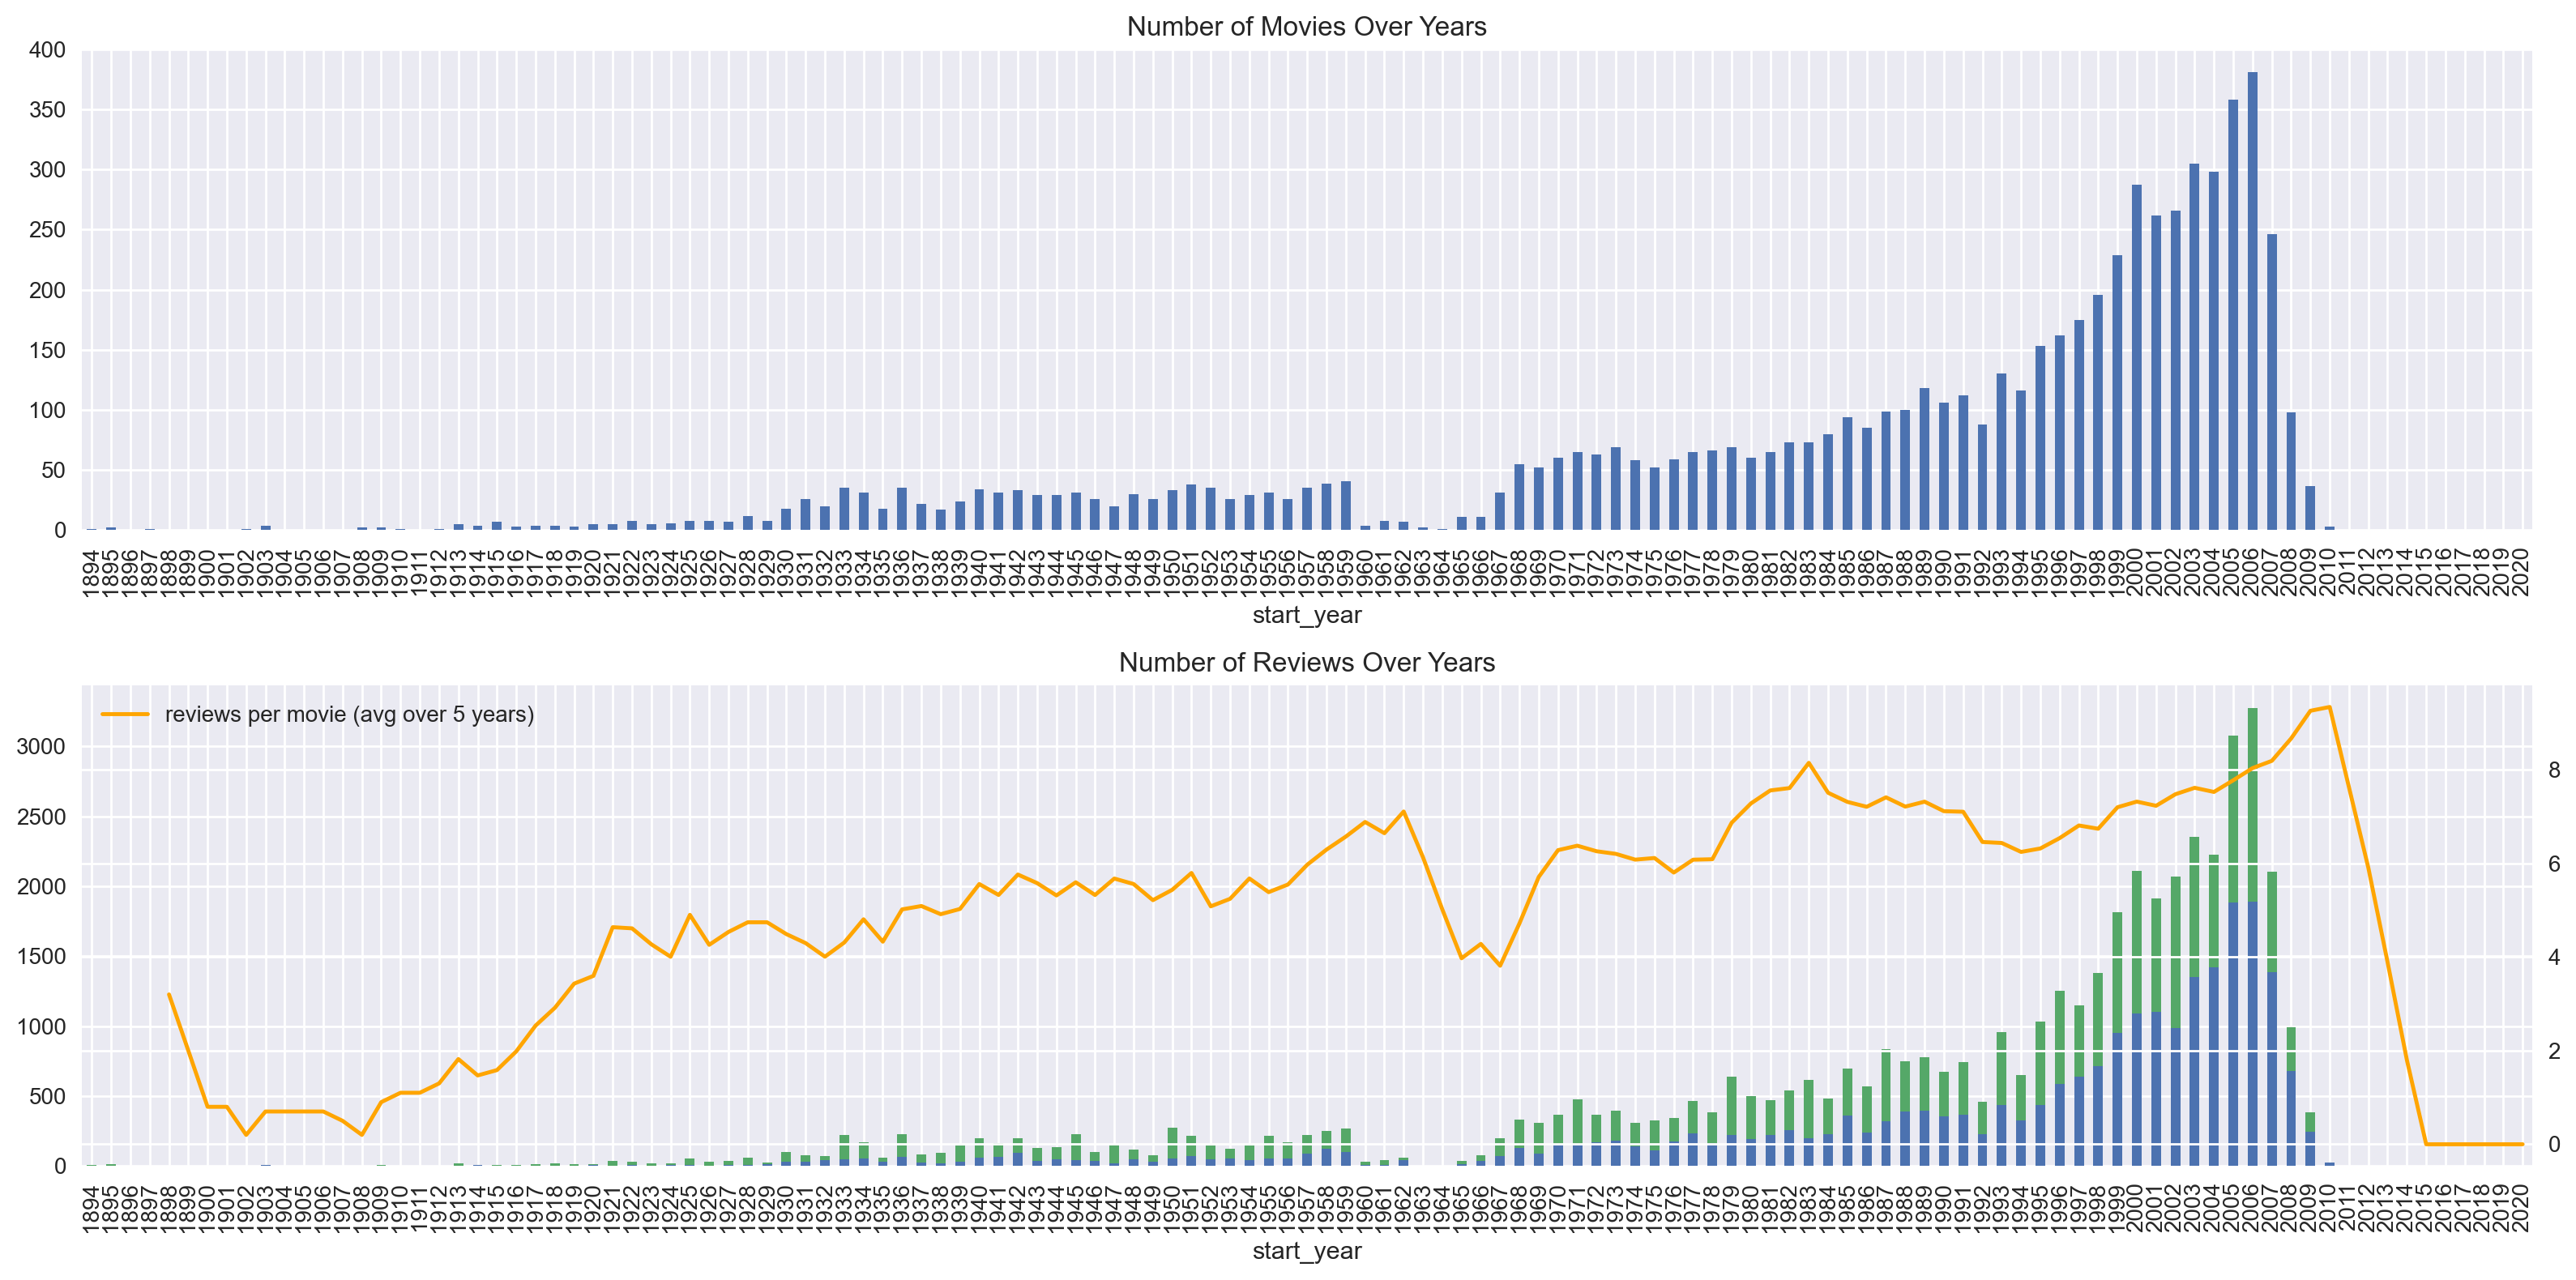

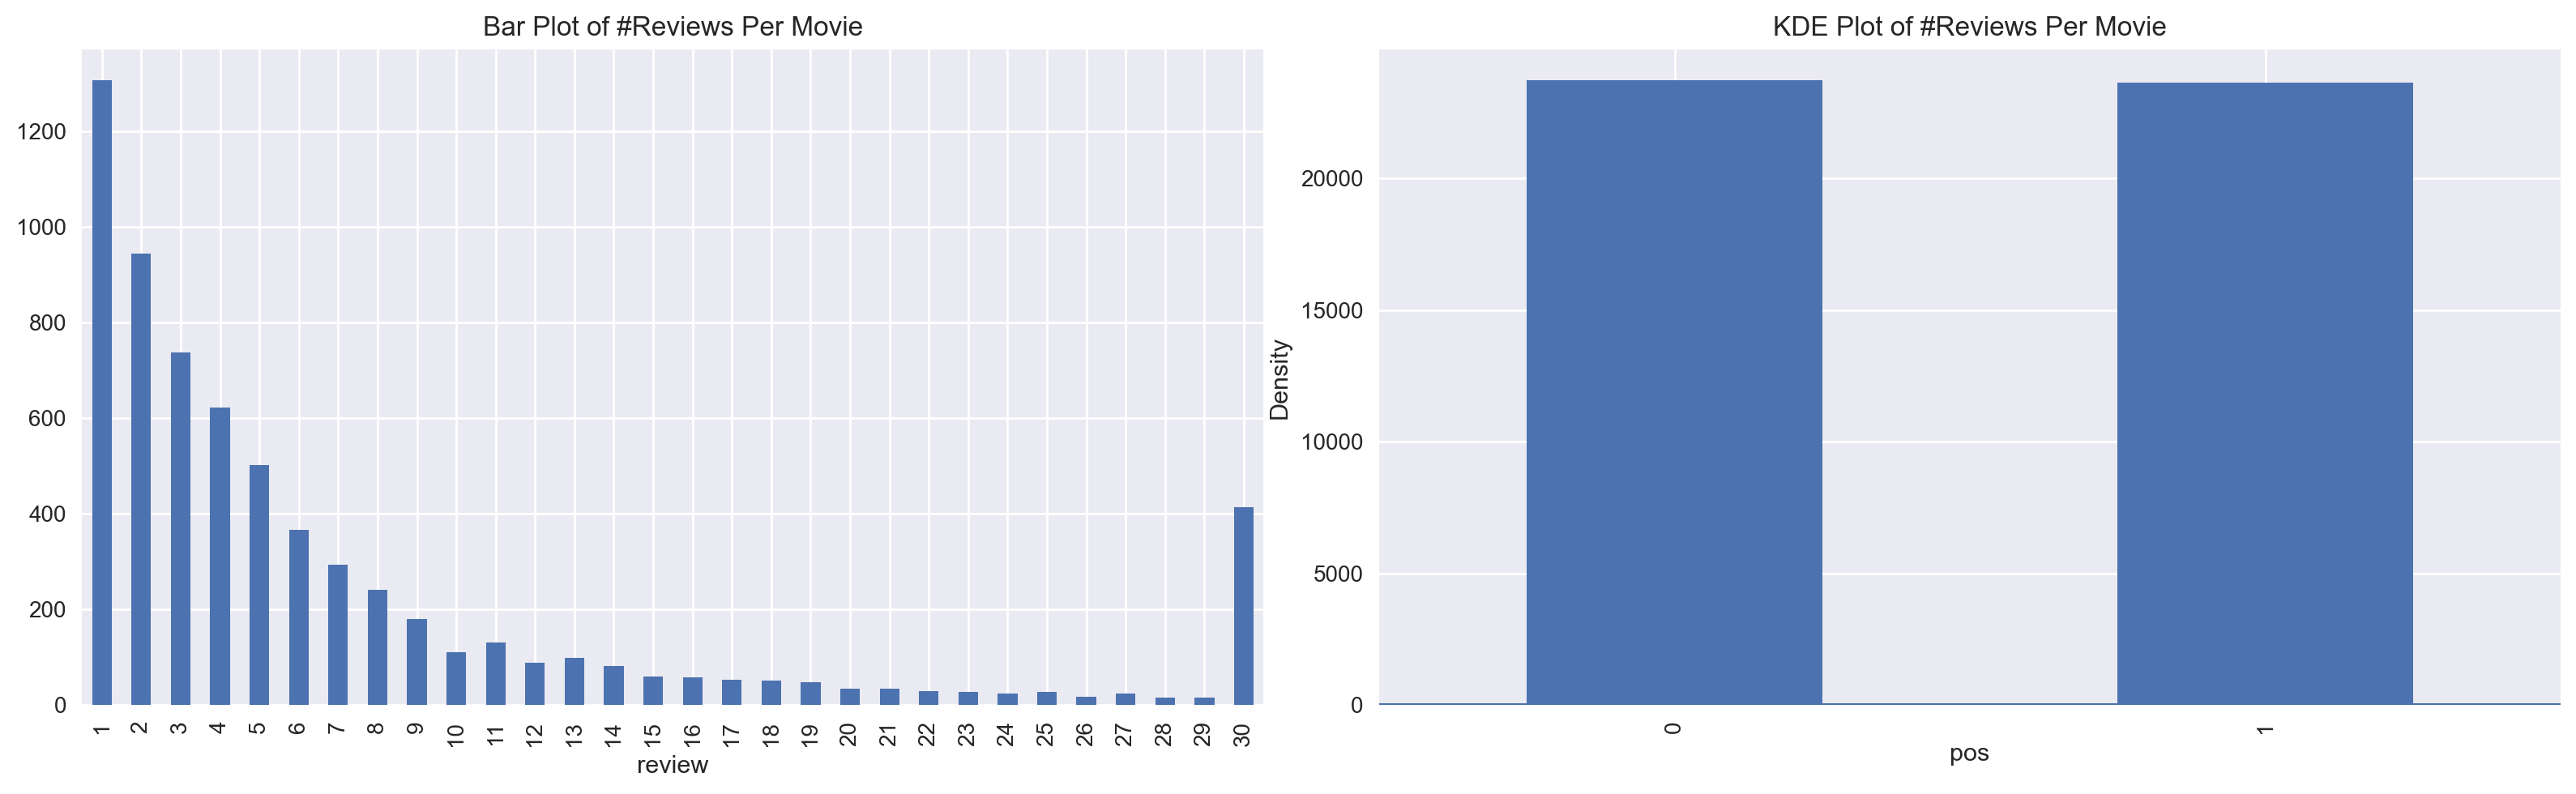

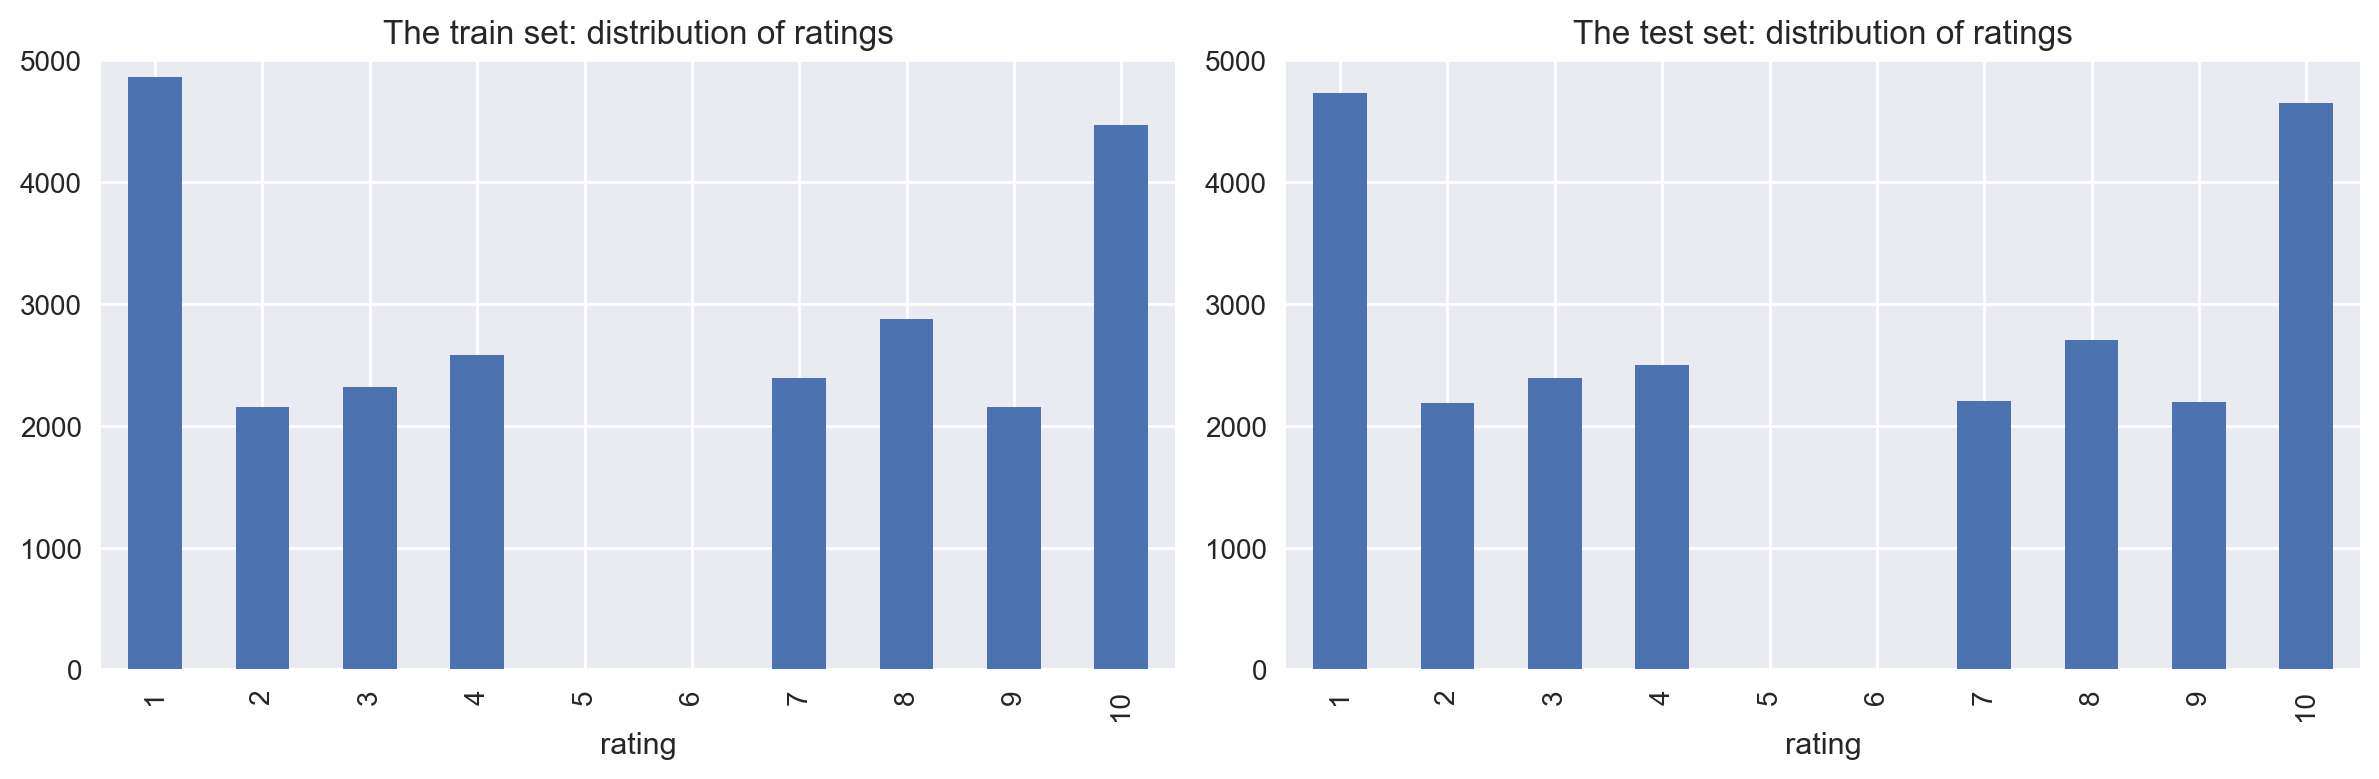

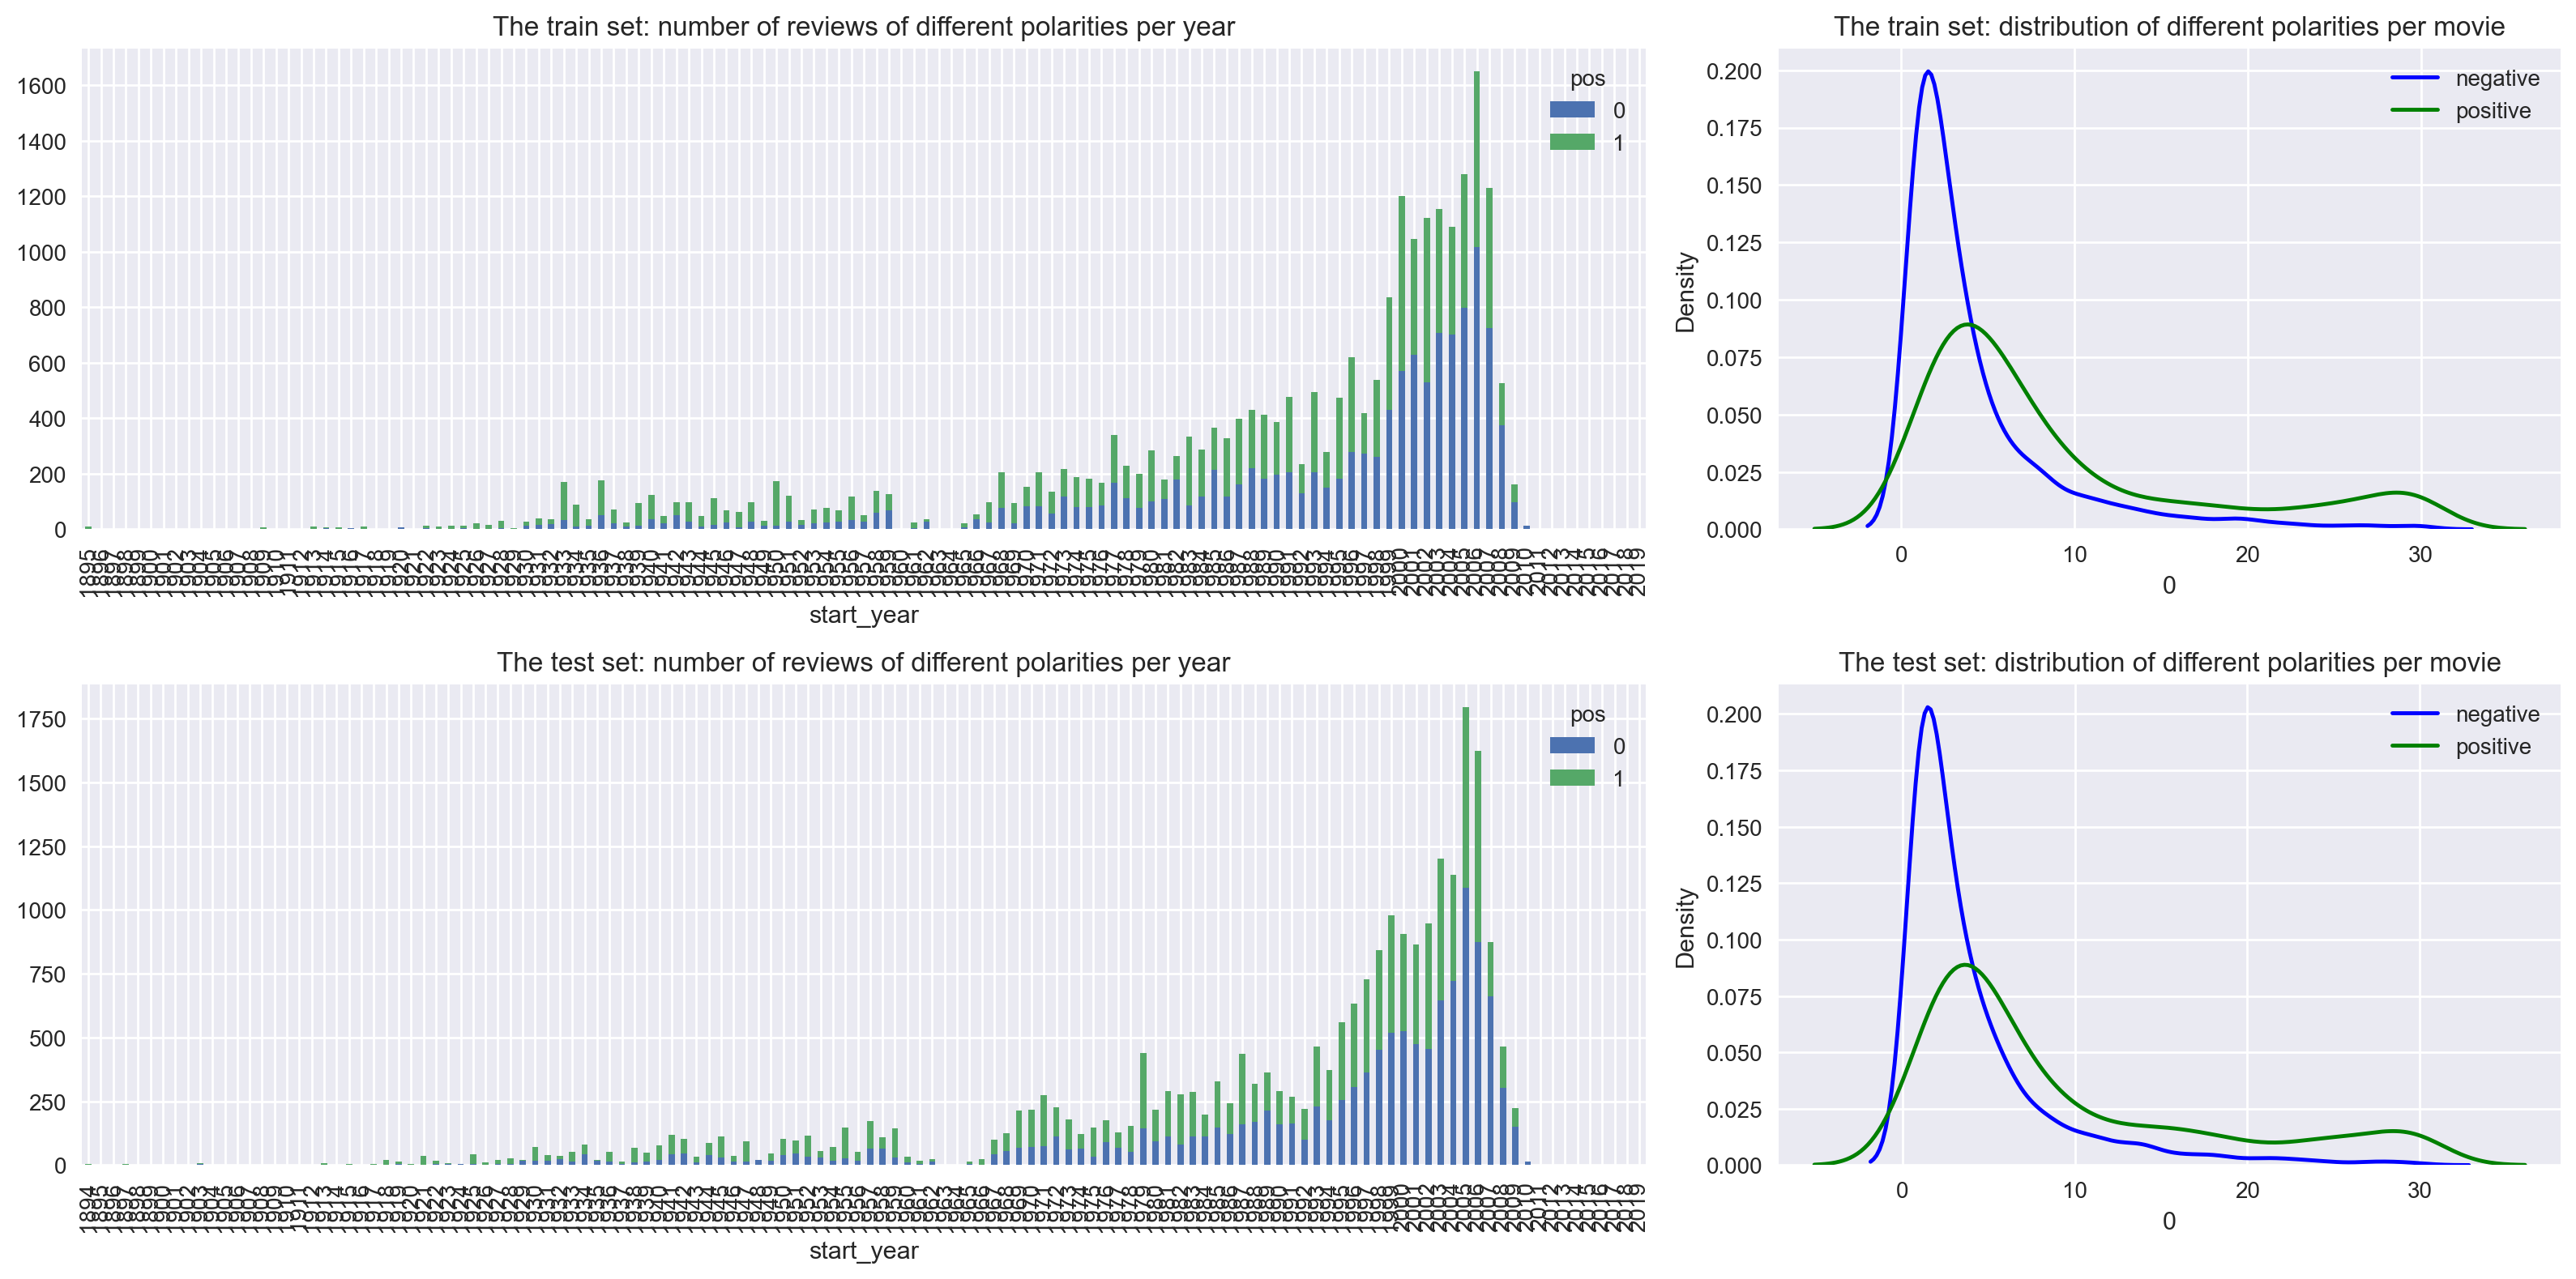

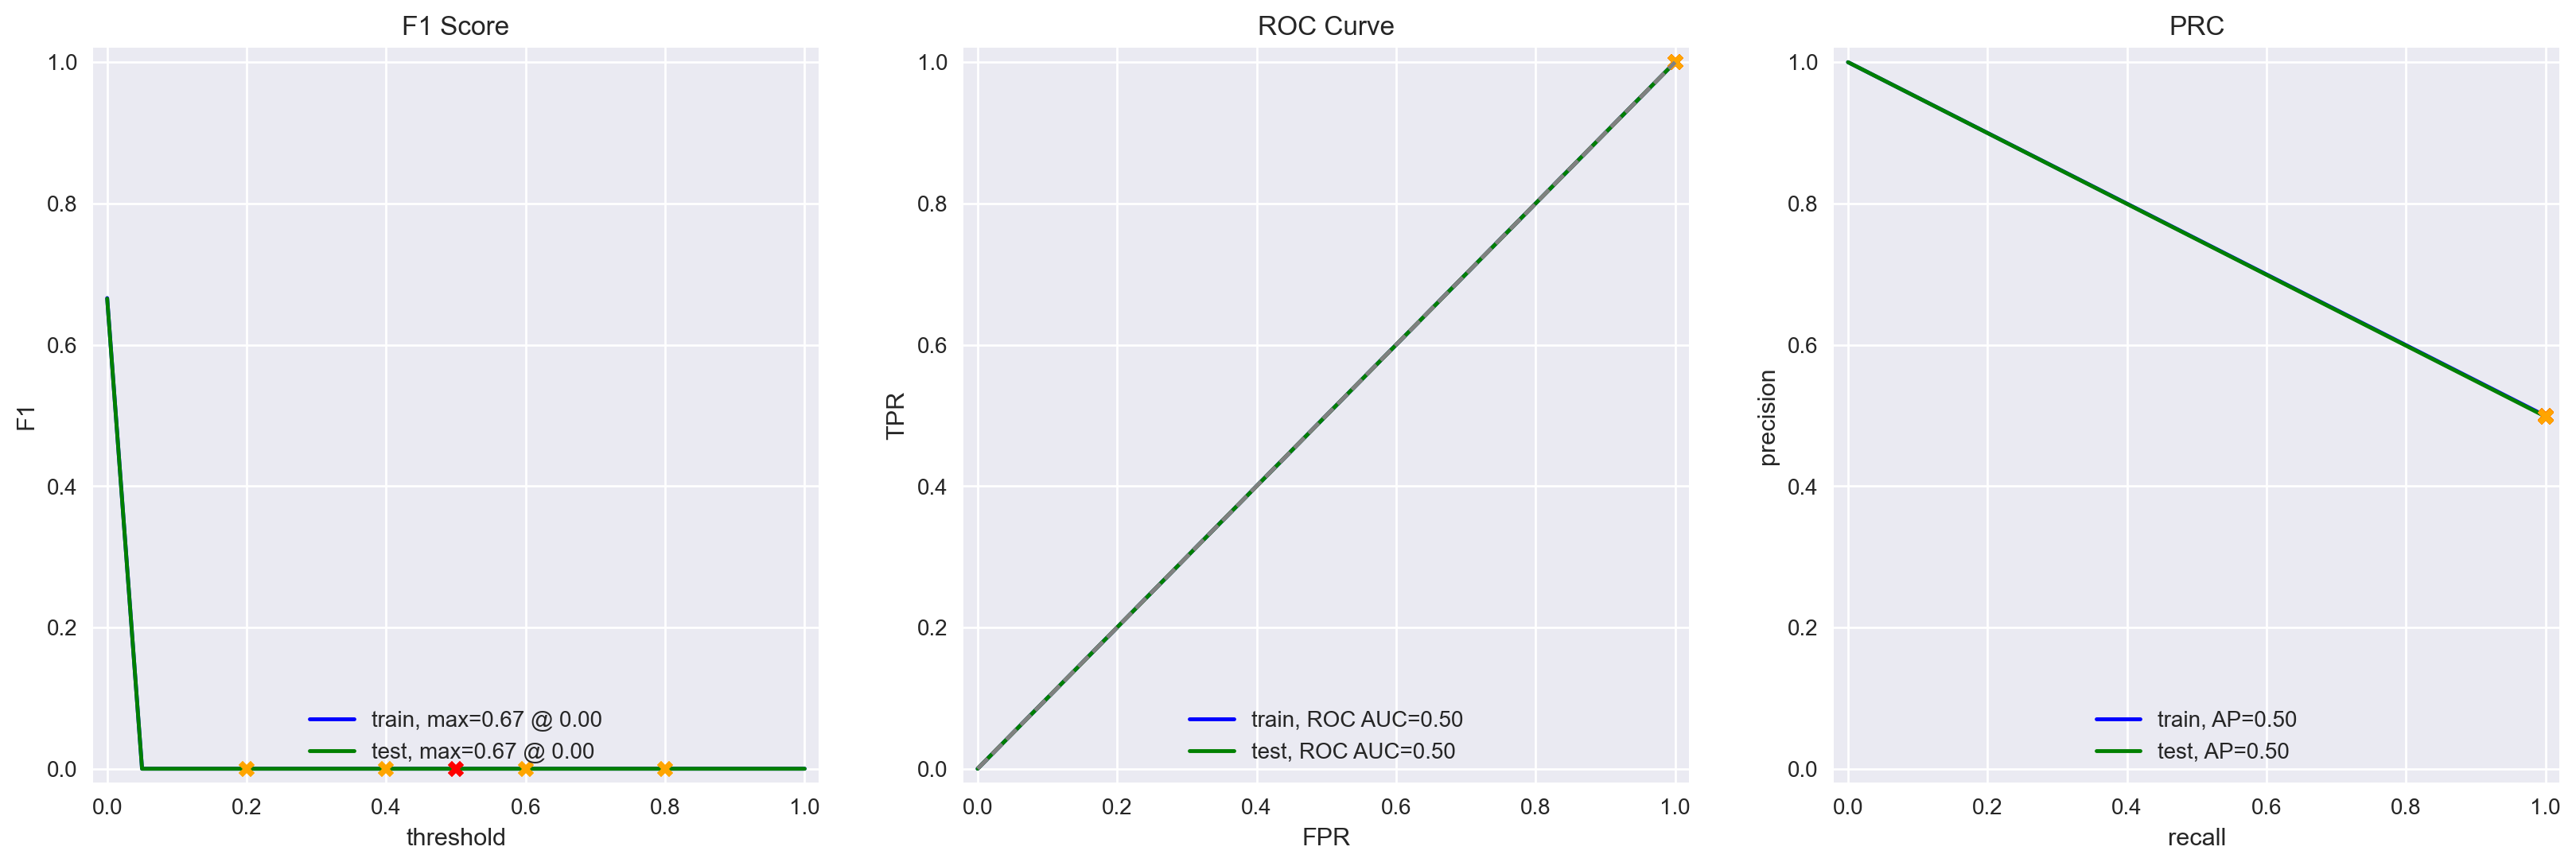

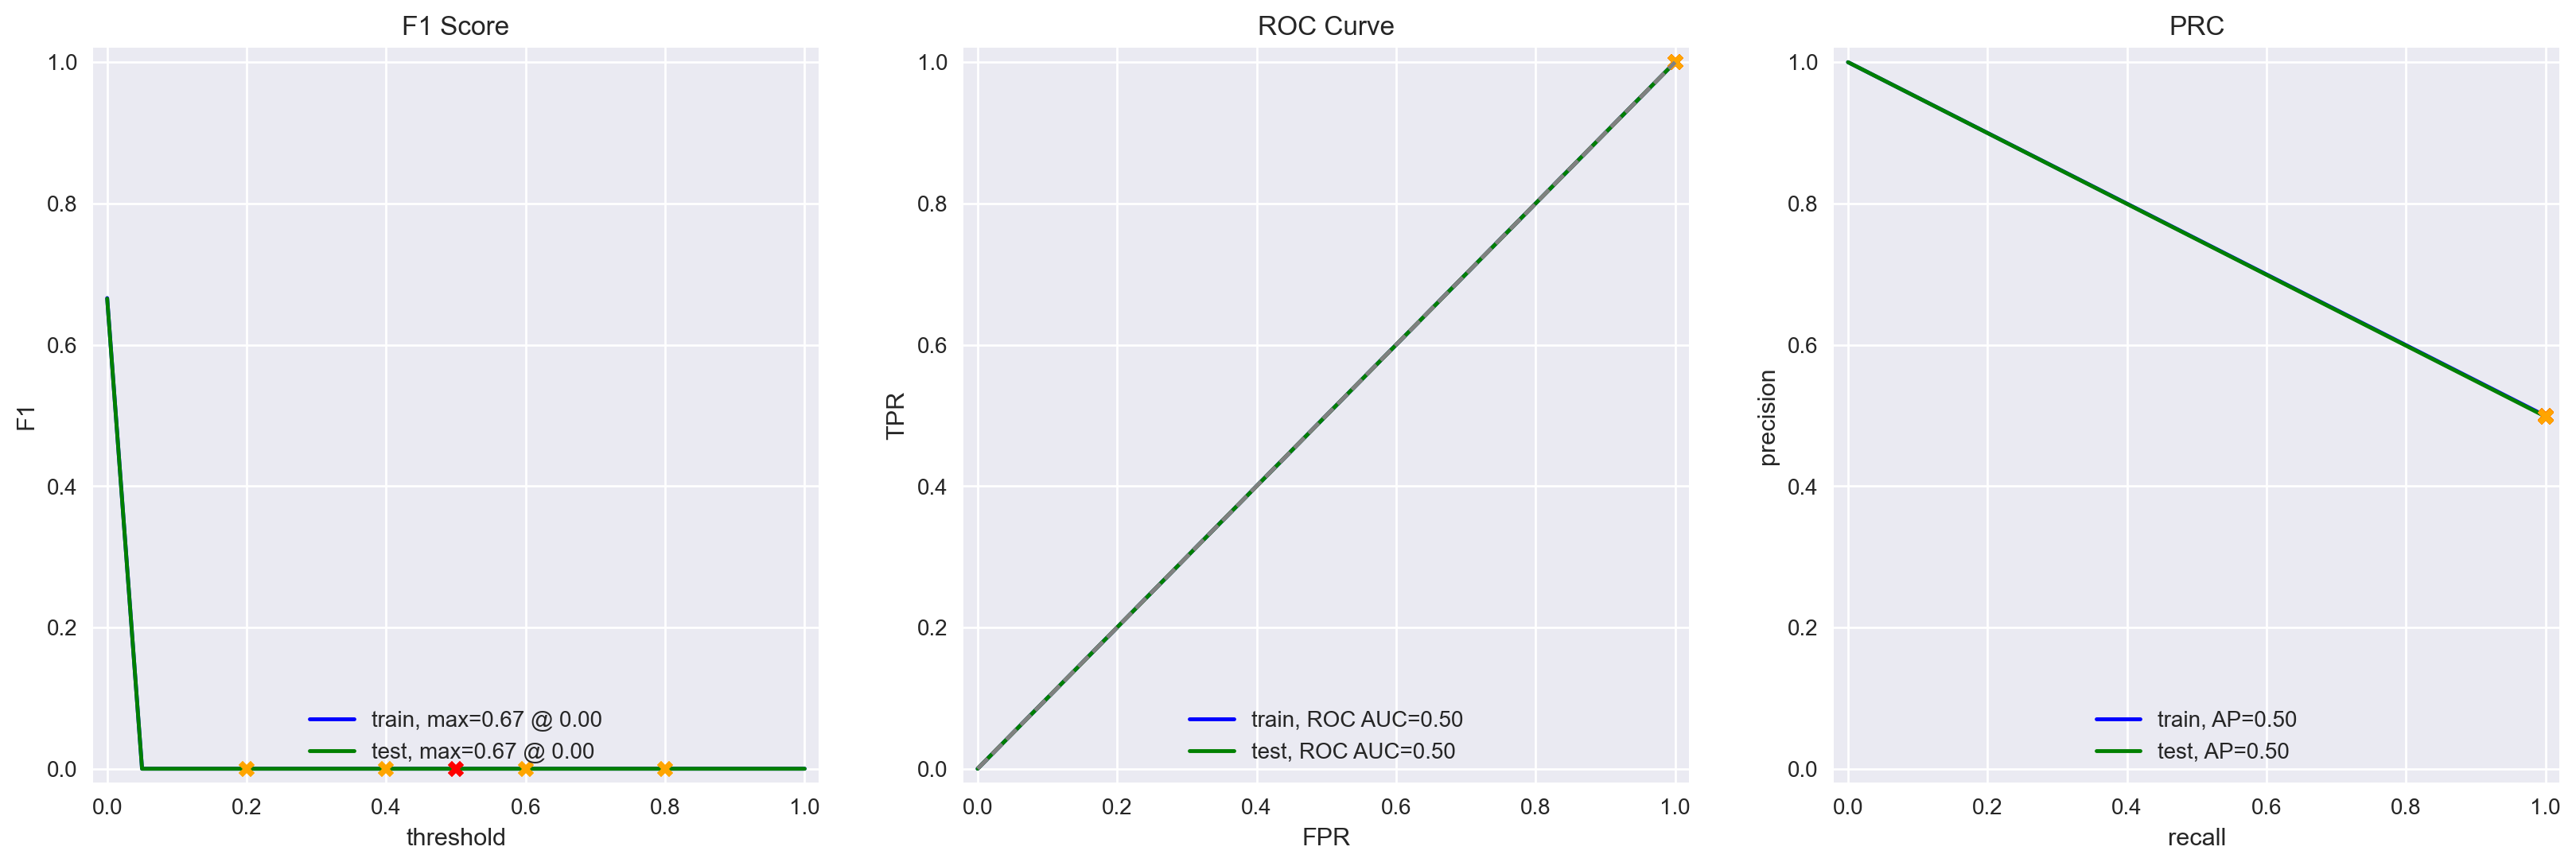

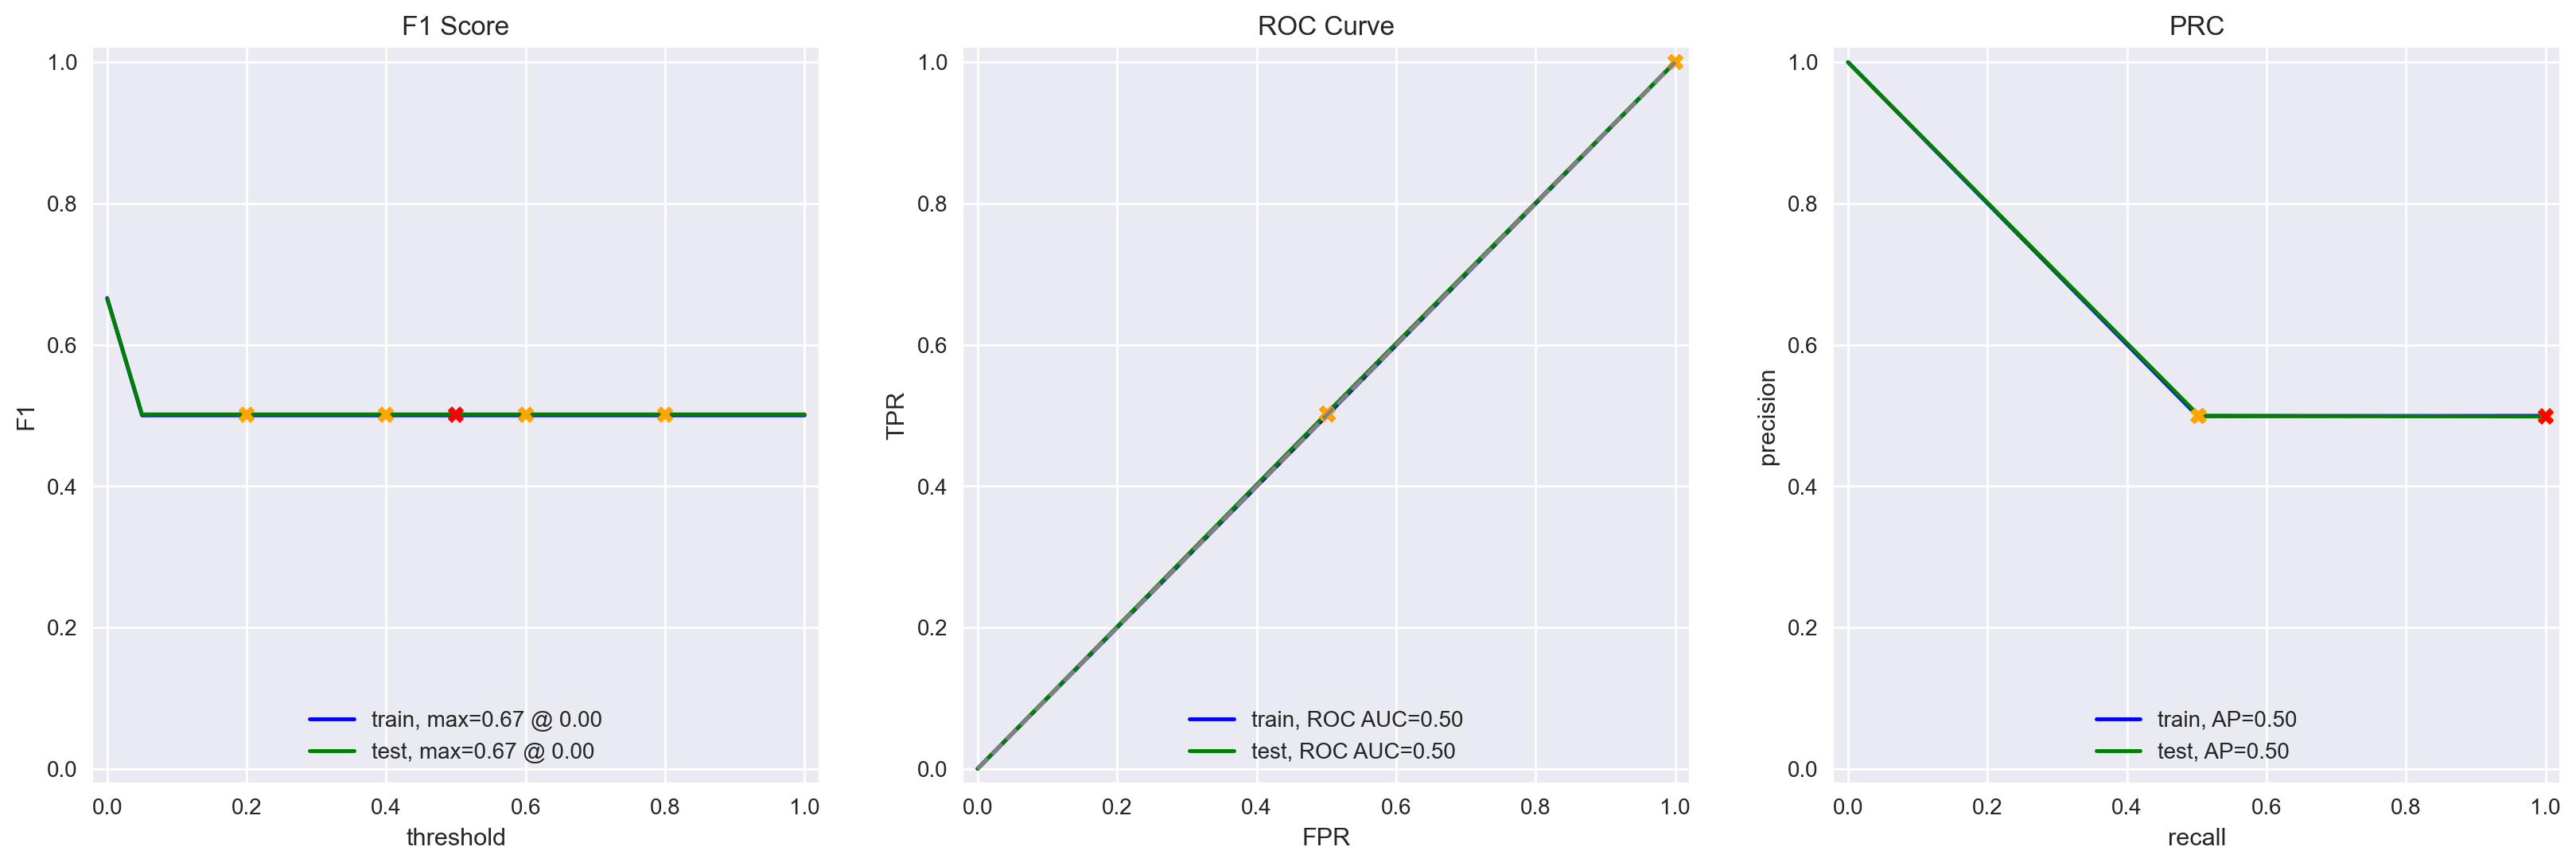

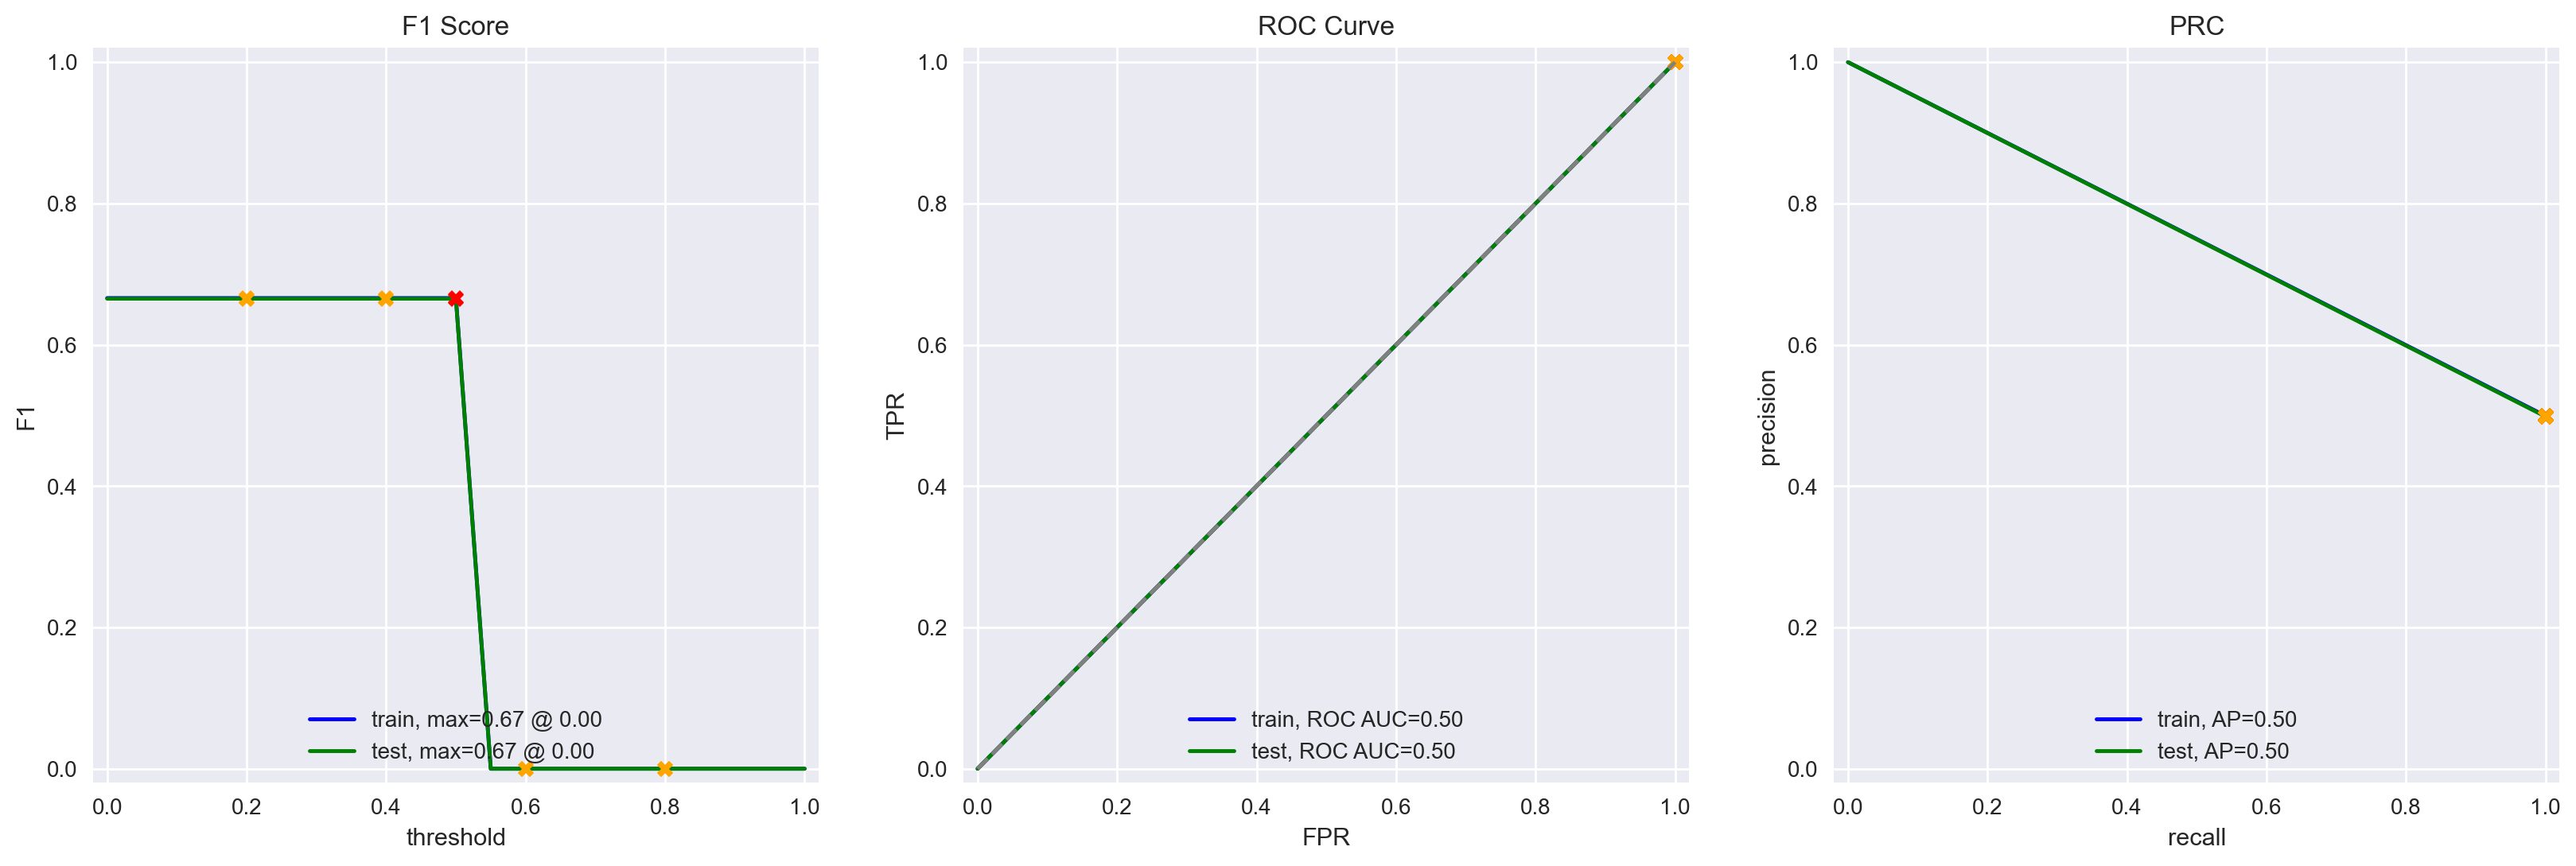

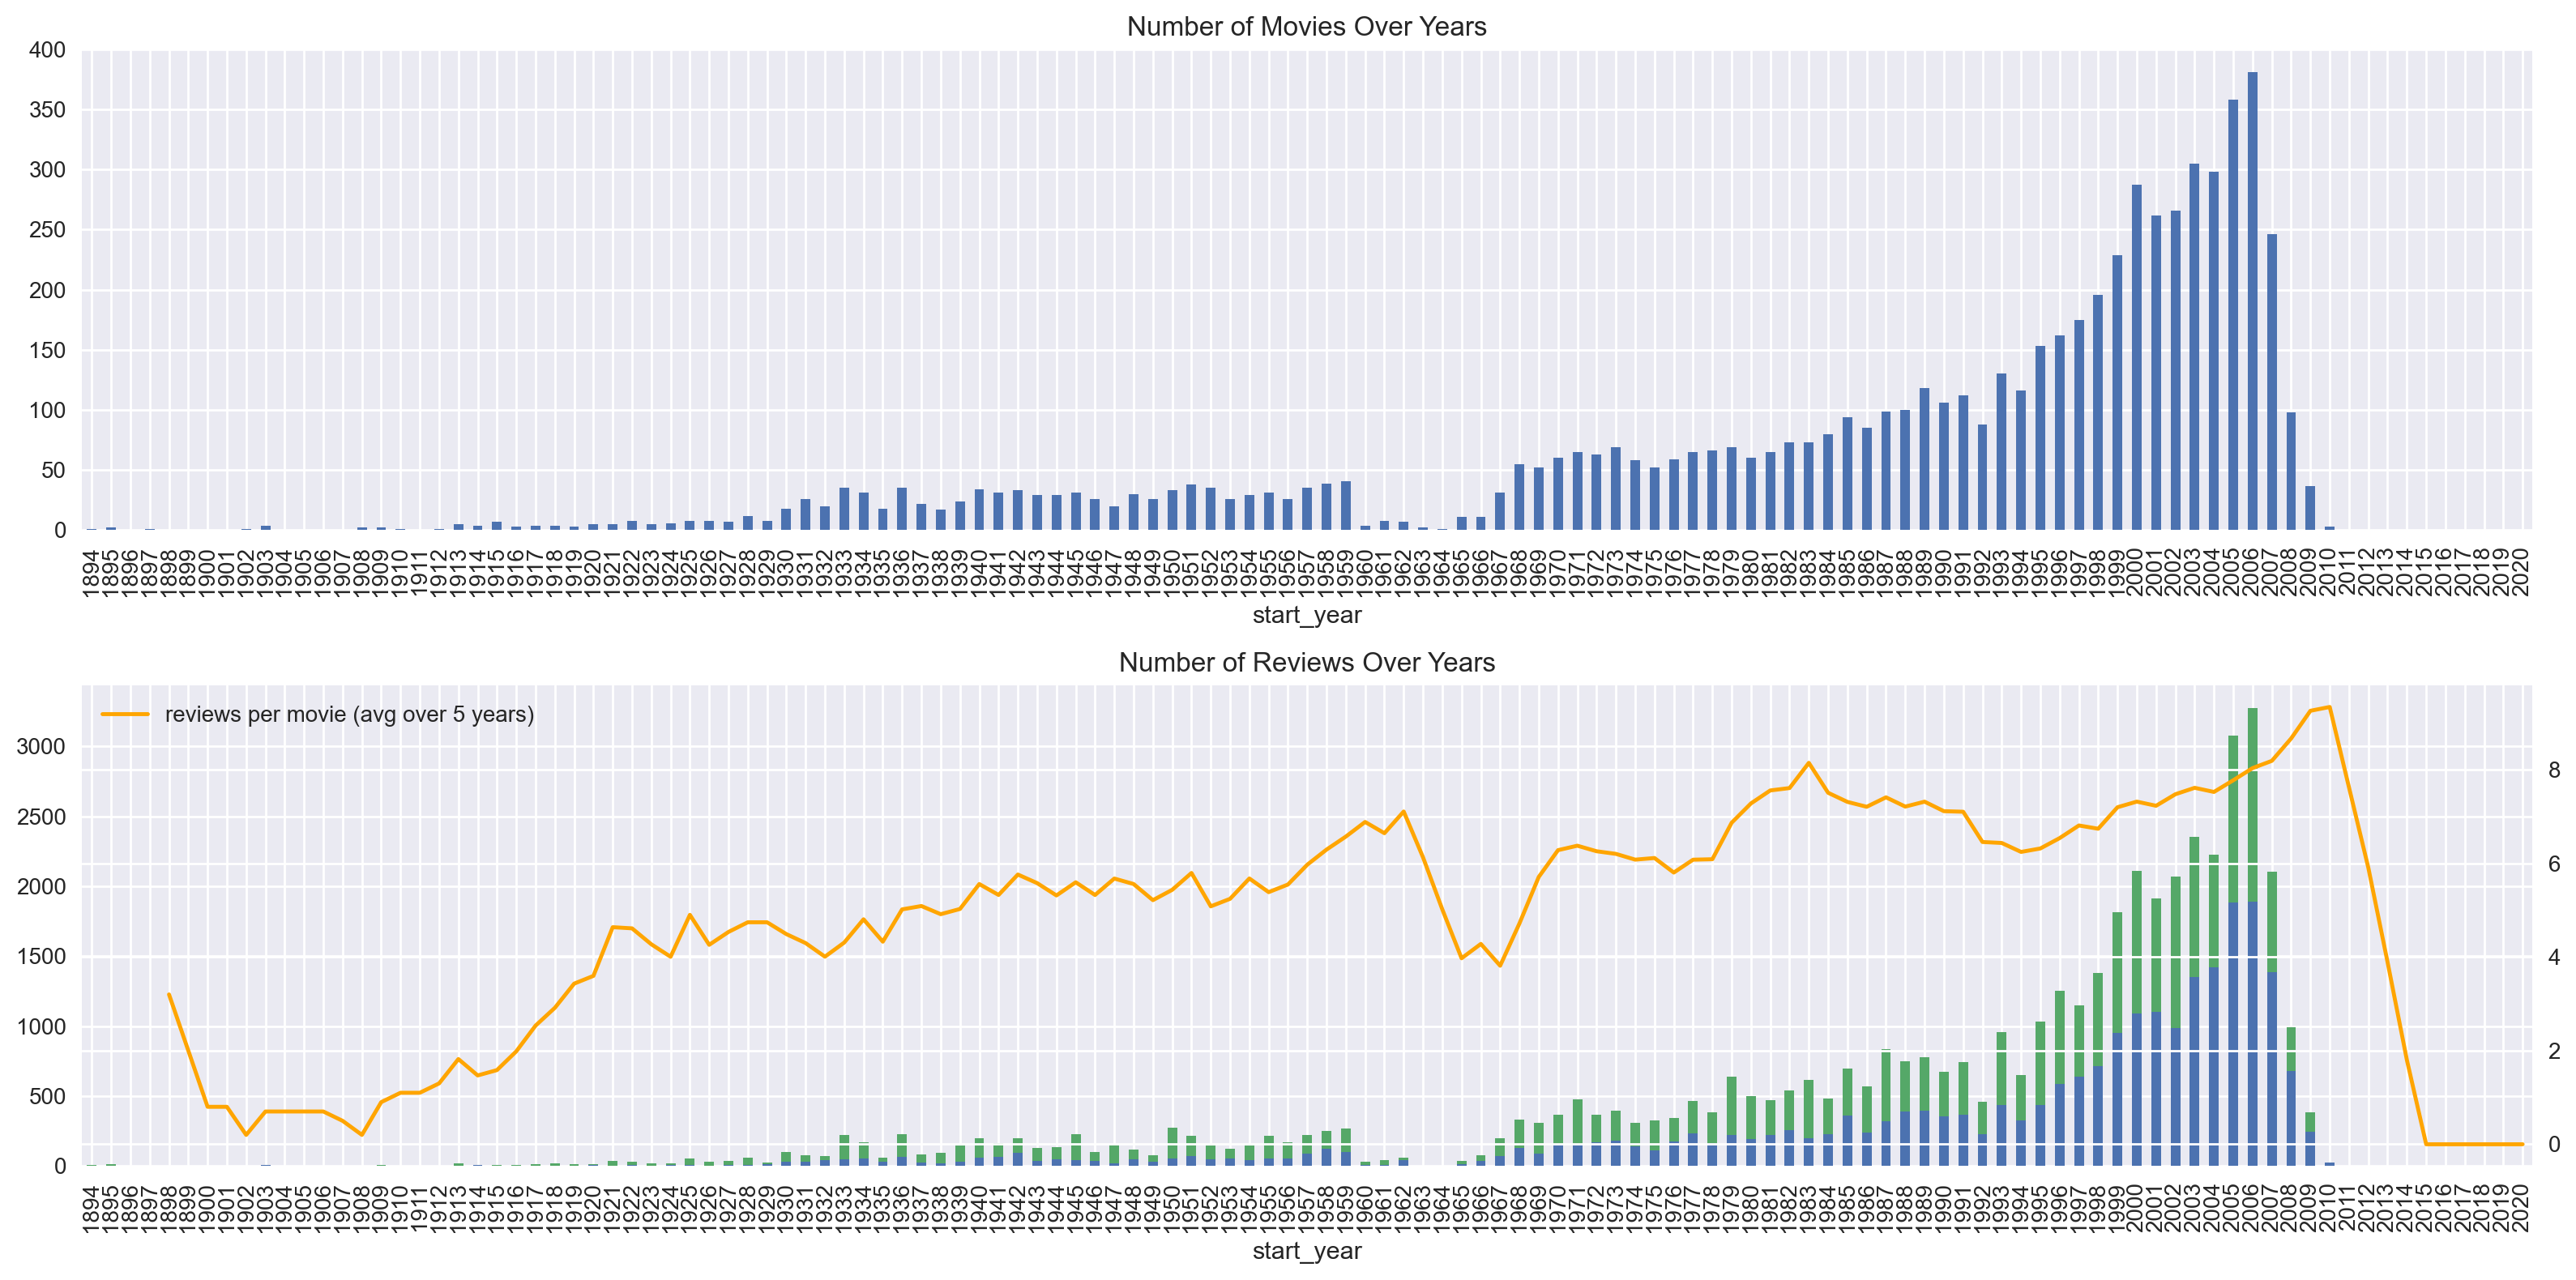

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

plt.show()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

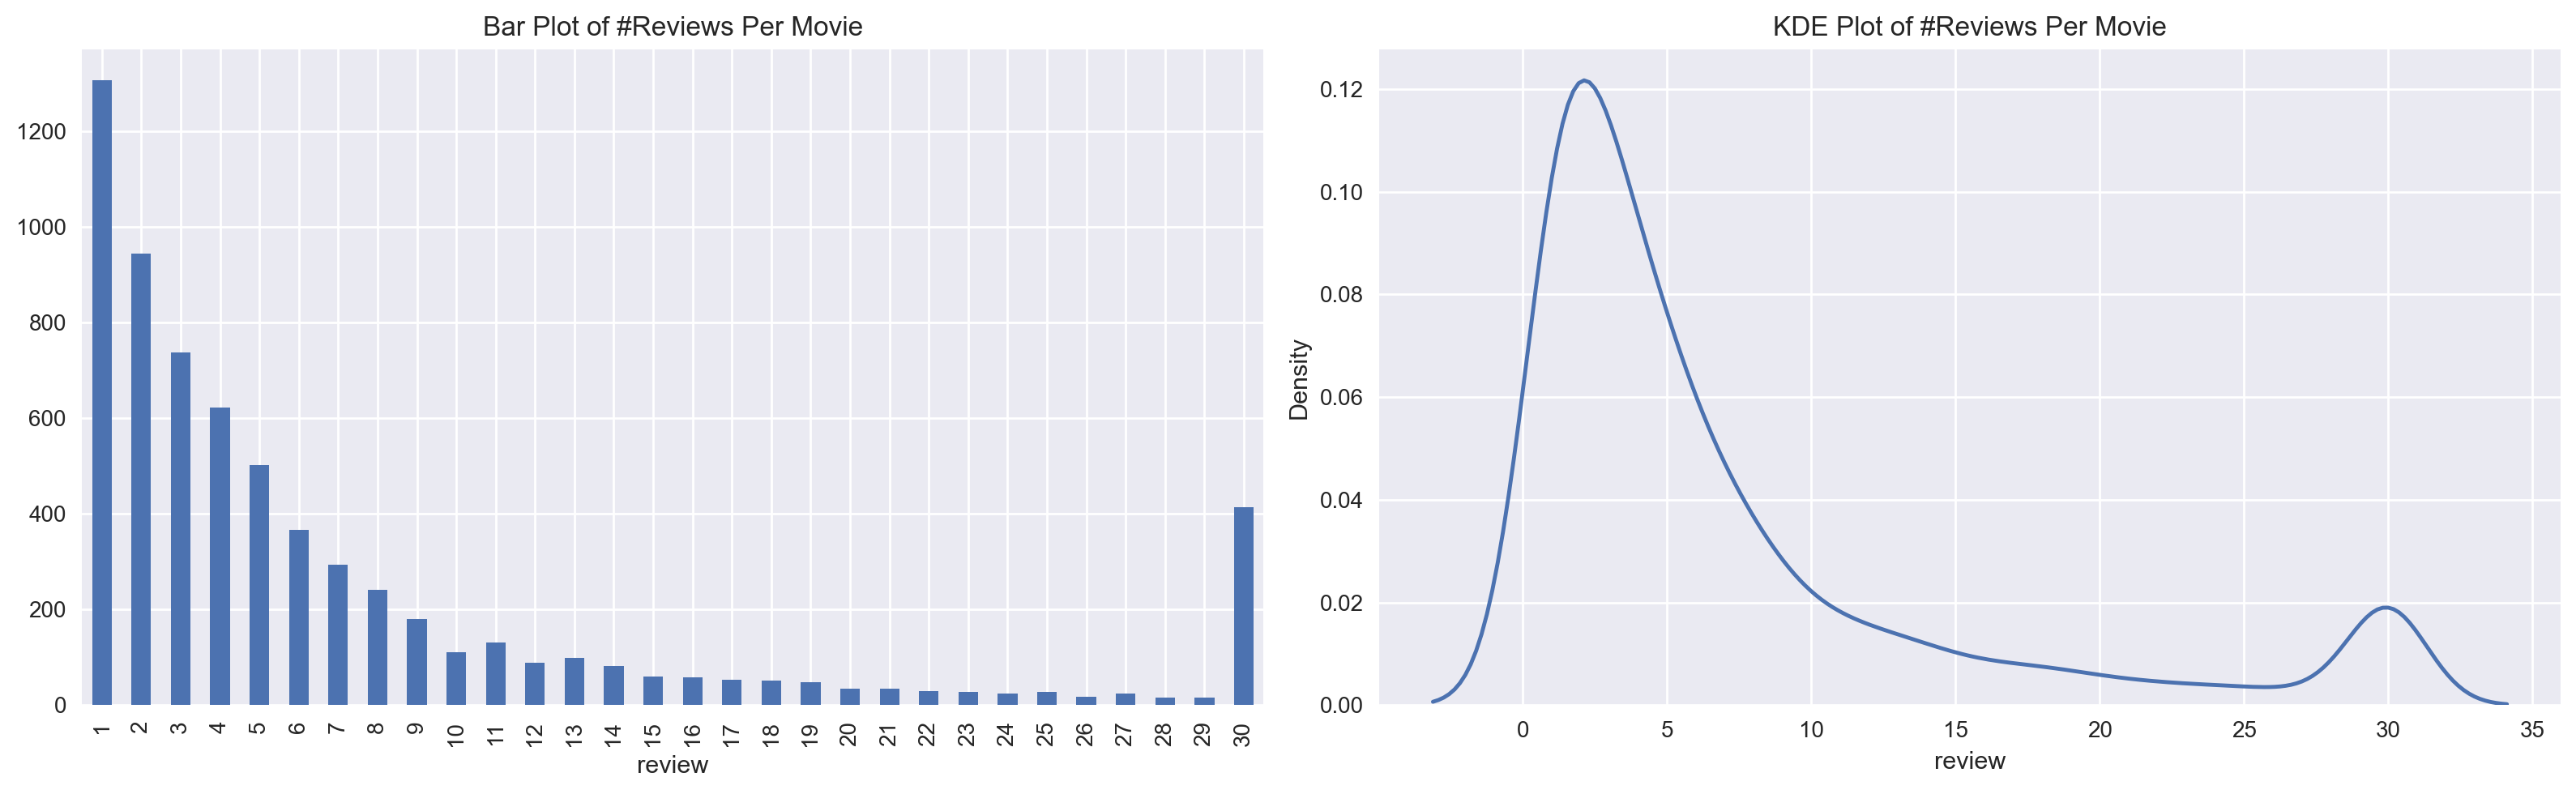

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

plt.show()

In [23]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

In [24]:
df_reviews['pos'].value_counts().plot(kind='bar')

<Axes: title={'center': 'KDE Plot of #Reviews Per Movie'}, xlabel='pos', ylabel='Density'>

In [25]:
print(f"Negative reviews (0): {23715} ({23715/47331*100:.1f}%)")
print(f"Positive reviews (1): {23616} ({23616/47331*100:.1f}%)")
print("\nThe classes are well balanced, no resampling needed.")

Negative reviews (0): 23715 (50.1%)
Positive reviews (1): 23616 (49.9%)

The classes are well balanced, no resampling needed.


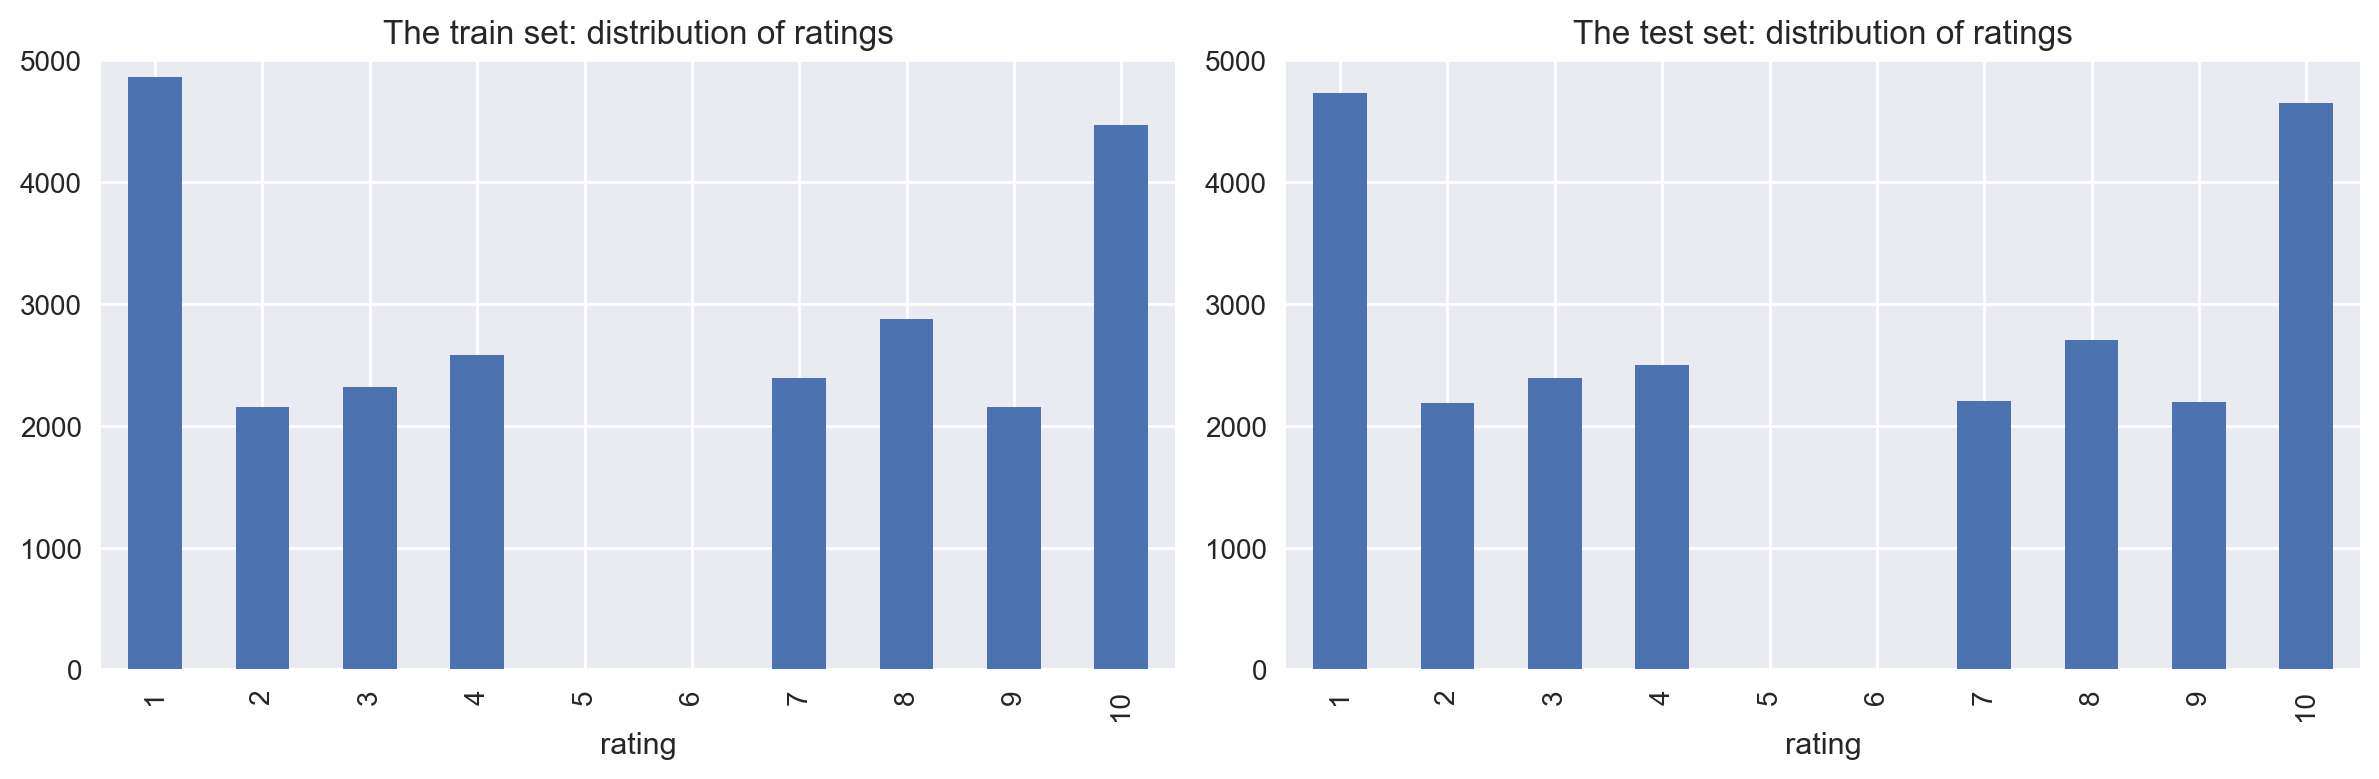

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

plt.show()

Distribution of negative and positive reviews over the years for two parts of the dataset

/var/folders/8t/whzv_x6s73z2lmg0llmb3lnc0000gn/T/ipykernel_56891/2451702969.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
/var/folders/8t/whzv_x6s73z2lmg0llmb3lnc0000gn/T/ipykernel_56891/2451702969.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
/var/folders/8t/whzv_x6s73z2lmg0llmb3lnc0000gn/T/ipykernel_56891/2451702969.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
/var/folders/8t/whzv_x6s73z2lmg0llmb3lnc0000gn/T/ip

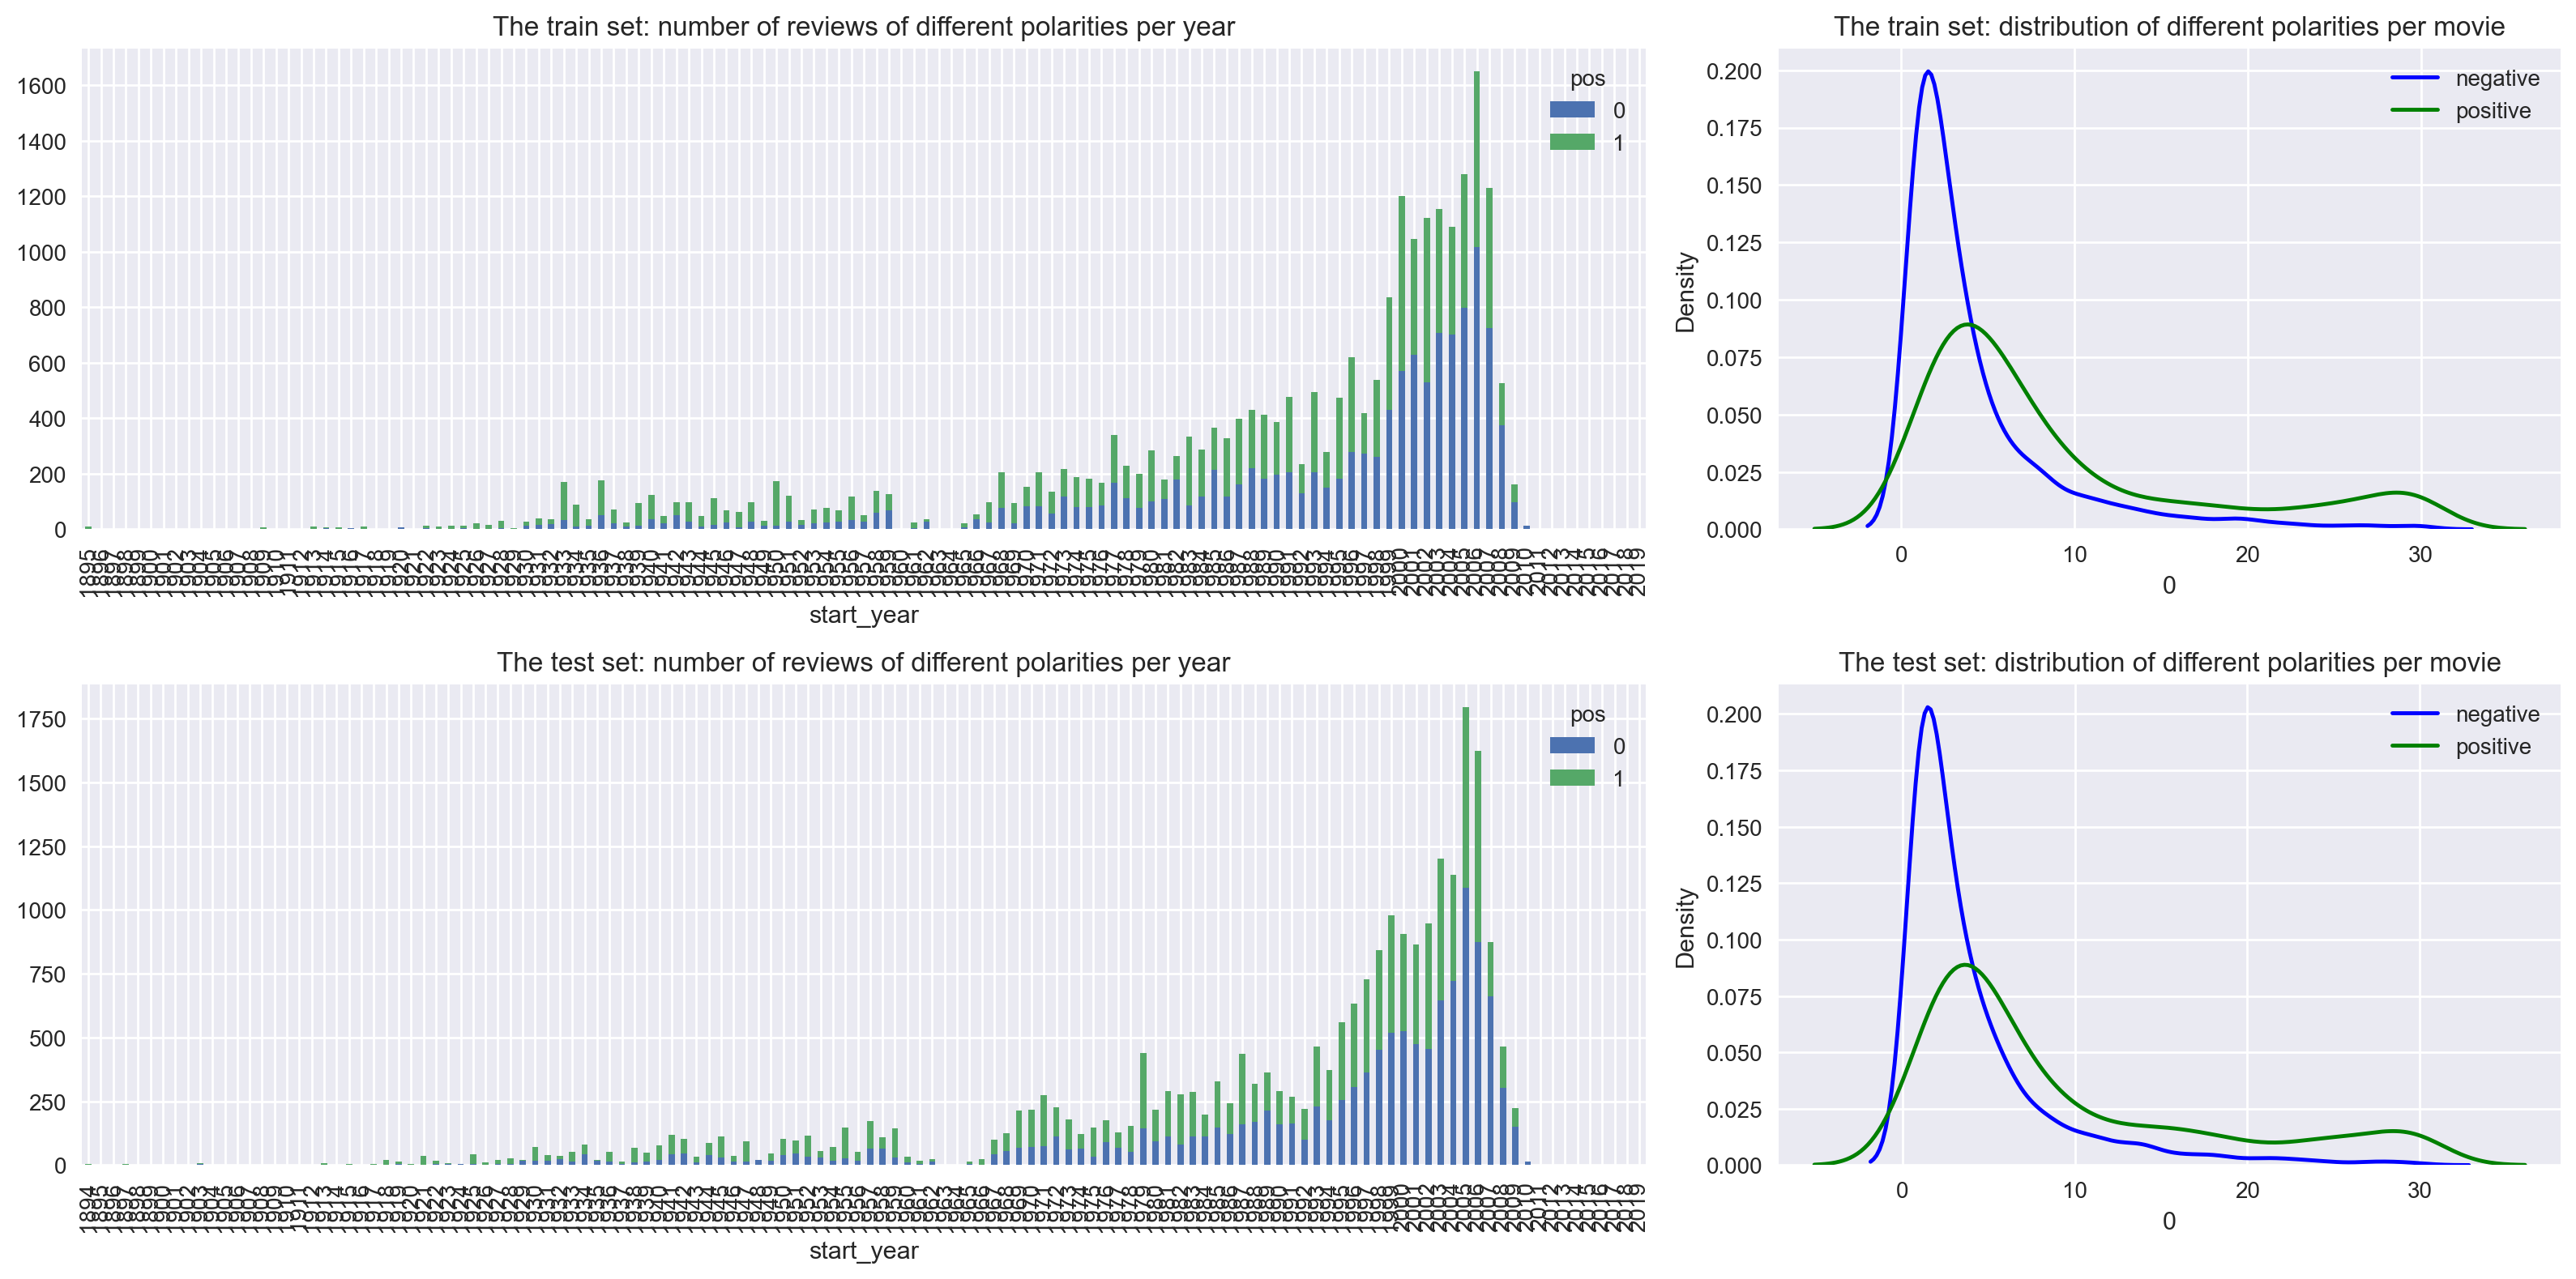

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. 
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [43]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    plt.show()
    return

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
I know it was in the precode, but it is a great opportunity to point out the following: 

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that the `type` veriable is green in the function above. When we see that your variables are green, we should think of another name, since green color indicates that this name is reserved in python. 
    
    
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [29]:
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace(r'[^a-z\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code! If we don't normalize the data, punctuation and digits can create useless tokens such as '12' or '!!', thus increasing dimensionality without adding value. As a result, it may reduce the model's generalization ability.

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [30]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
model_0 = DummyClassifier(strategy='most_frequent', random_state=42)
model_0.fit(df_reviews_train[['review_norm']], train_target)

DummyClassifier(random_state=42, strategy='most_frequent')

In [33]:
evaluate_model(model_0, df_reviews_train[['review_norm']], train_target, 
               df_reviews_test[['review_norm']], test_target)

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


Baseline is predicting correctly 50% of the time because classes are balanced 50/50 - working as expected to use as a comparison for other models. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. You can also check the result using different strategy values.
</div>

In [34]:
for strategy in ['most_frequent', 'stratified', 'uniform']:
    model = DummyClassifier(strategy=strategy, random_state=42)
    model.fit(df_reviews_train[['review_norm']], train_target)
    print(f"\nStrategy: {strategy}")
    evaluate_model(model, df_reviews_train[['review_norm']], train_target, 
                   df_reviews_test[['review_norm']], test_target)


Strategy: most_frequent
          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5

Strategy: stratified
          train  test
Accuracy    0.5   0.5
F1          0.5   0.5
APS         0.5   0.5
ROC AUC     0.5   0.5

Strategy: uniform
          train  test
Accuracy   0.51   0.5
F1         0.51   0.5
APS        0.50   0.5
ROC AUC    0.50   0.5


### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [35]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [36]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/oliviarohm/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Create TF-IDF vectorizer with stopwords
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stop_words, max_features=10000)

# Transform training data
train_features_1 = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_norm'])

# Transform test data
test_features_1 = tfidf_vectorizer_1.transform(df_reviews_test['review_norm'])

# Train logistic regression model
model_1 = LogisticRegression(random_state=42, max_iter=1000)
model_1.fit(train_features_1, train_target)

LogisticRegression(max_iter=1000, random_state=42)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


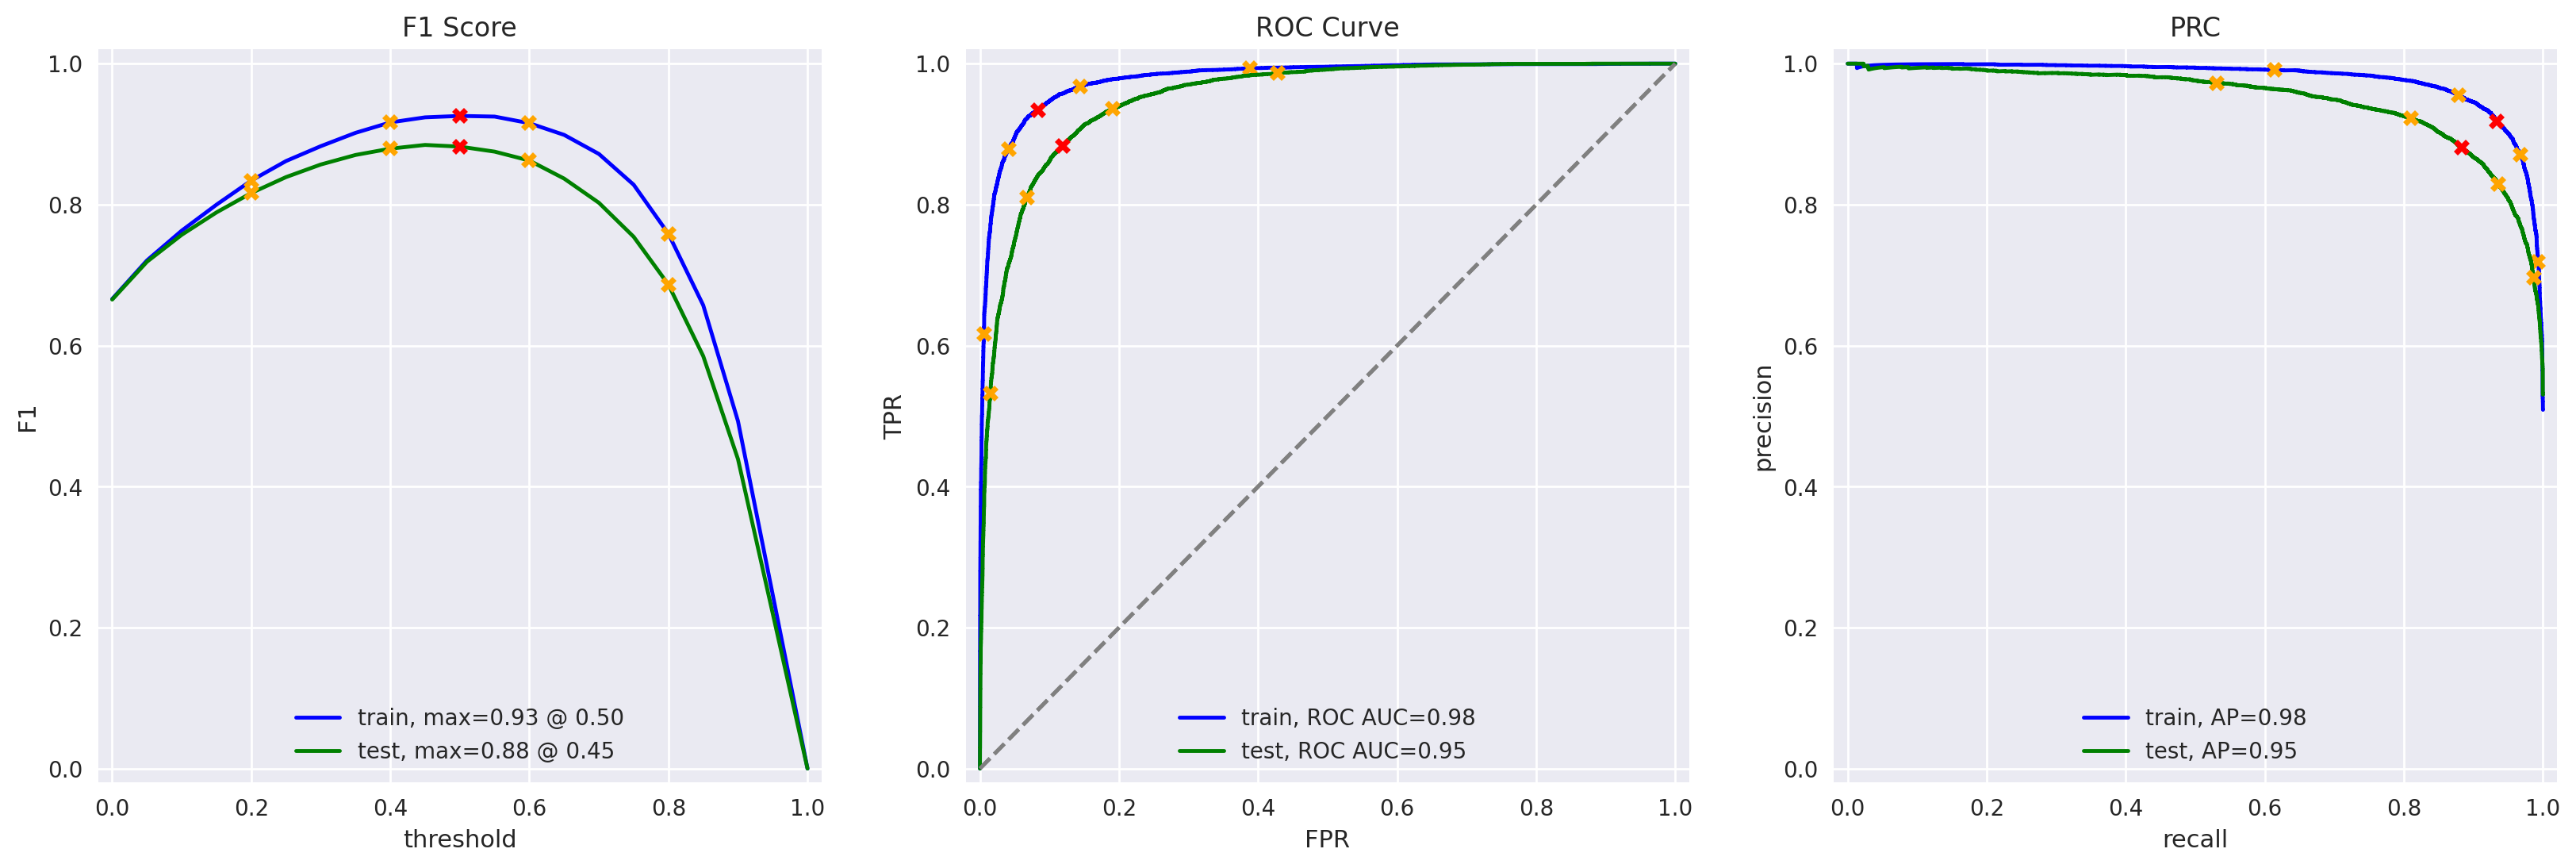

In [ ]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

**F1 score on the test is .88, which is a great improvement to the baseline of 0.0**

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [ ]:
# Apply spaCy preprocessing to training data
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)

# Apply spaCy preprocessing to test data  
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer_3 = TfidfVectorizer(max_features=10000)

# Transform data
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_spacy'])
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_spacy'])

# Train logistic regression
model_3 = LogisticRegression(random_state=42, max_iter=1000)
model_3.fit(train_features_3, train_target)

LogisticRegression(max_iter=1000, random_state=42)

          train  test
Accuracy   0.92  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


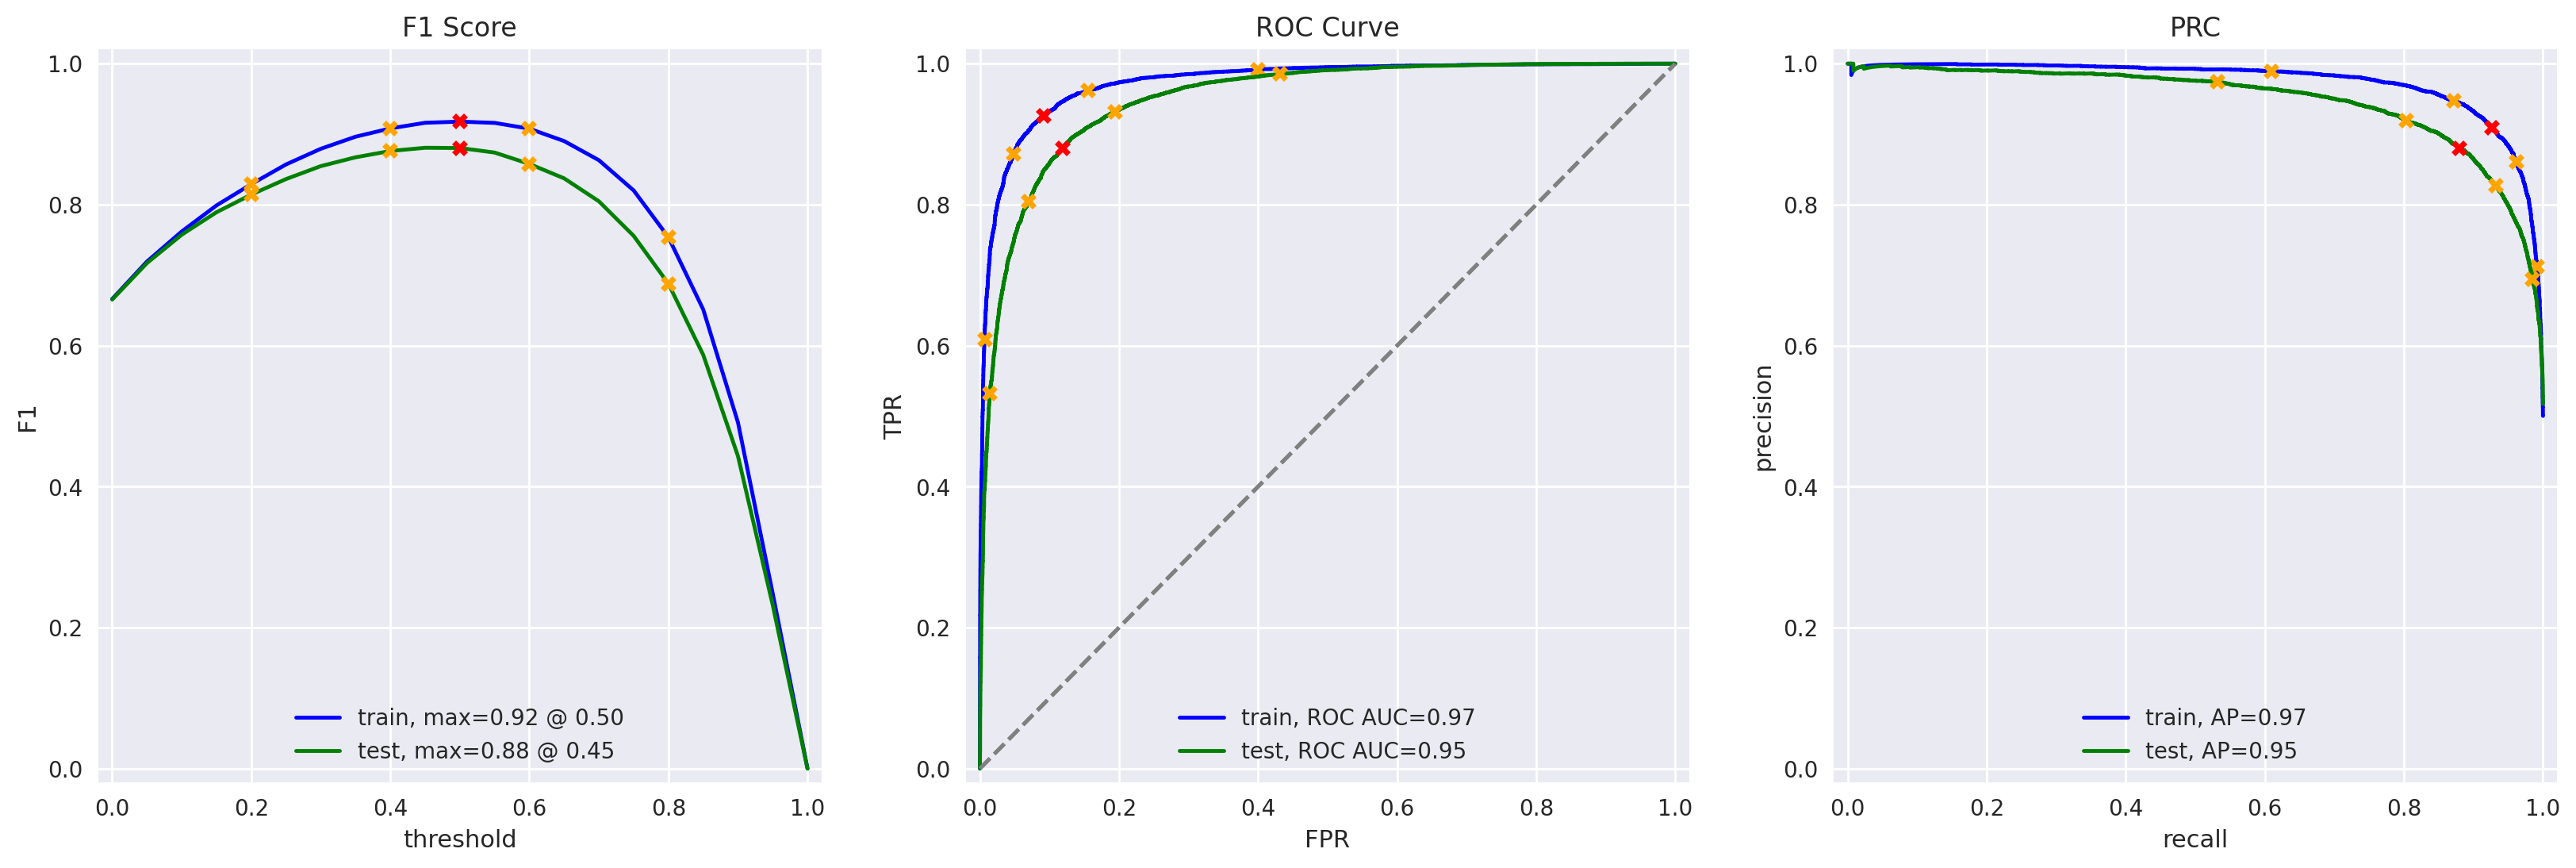

In [ ]:
# Evaluate Model 3
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

**Both Model 2 (NLTK) and Model 3 (spaCy Preprocessing) give similar results, F1 exceeds the 0.85 target**

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
We see quite similar performance. 
    
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Reuse from Model 3
tfidf_vectorizer_4 = tfidf_vectorizer_3

# Reuse/rename features from model 3
train_features_4 = train_features_3
test_features_4 = test_features_3

# Train LightGBM model
model_4 = LGBMClassifier(random_state=42, n_estimators=100)
model_4.fit(train_features_4, train_target)

LGBMClassifier(random_state=42)

          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


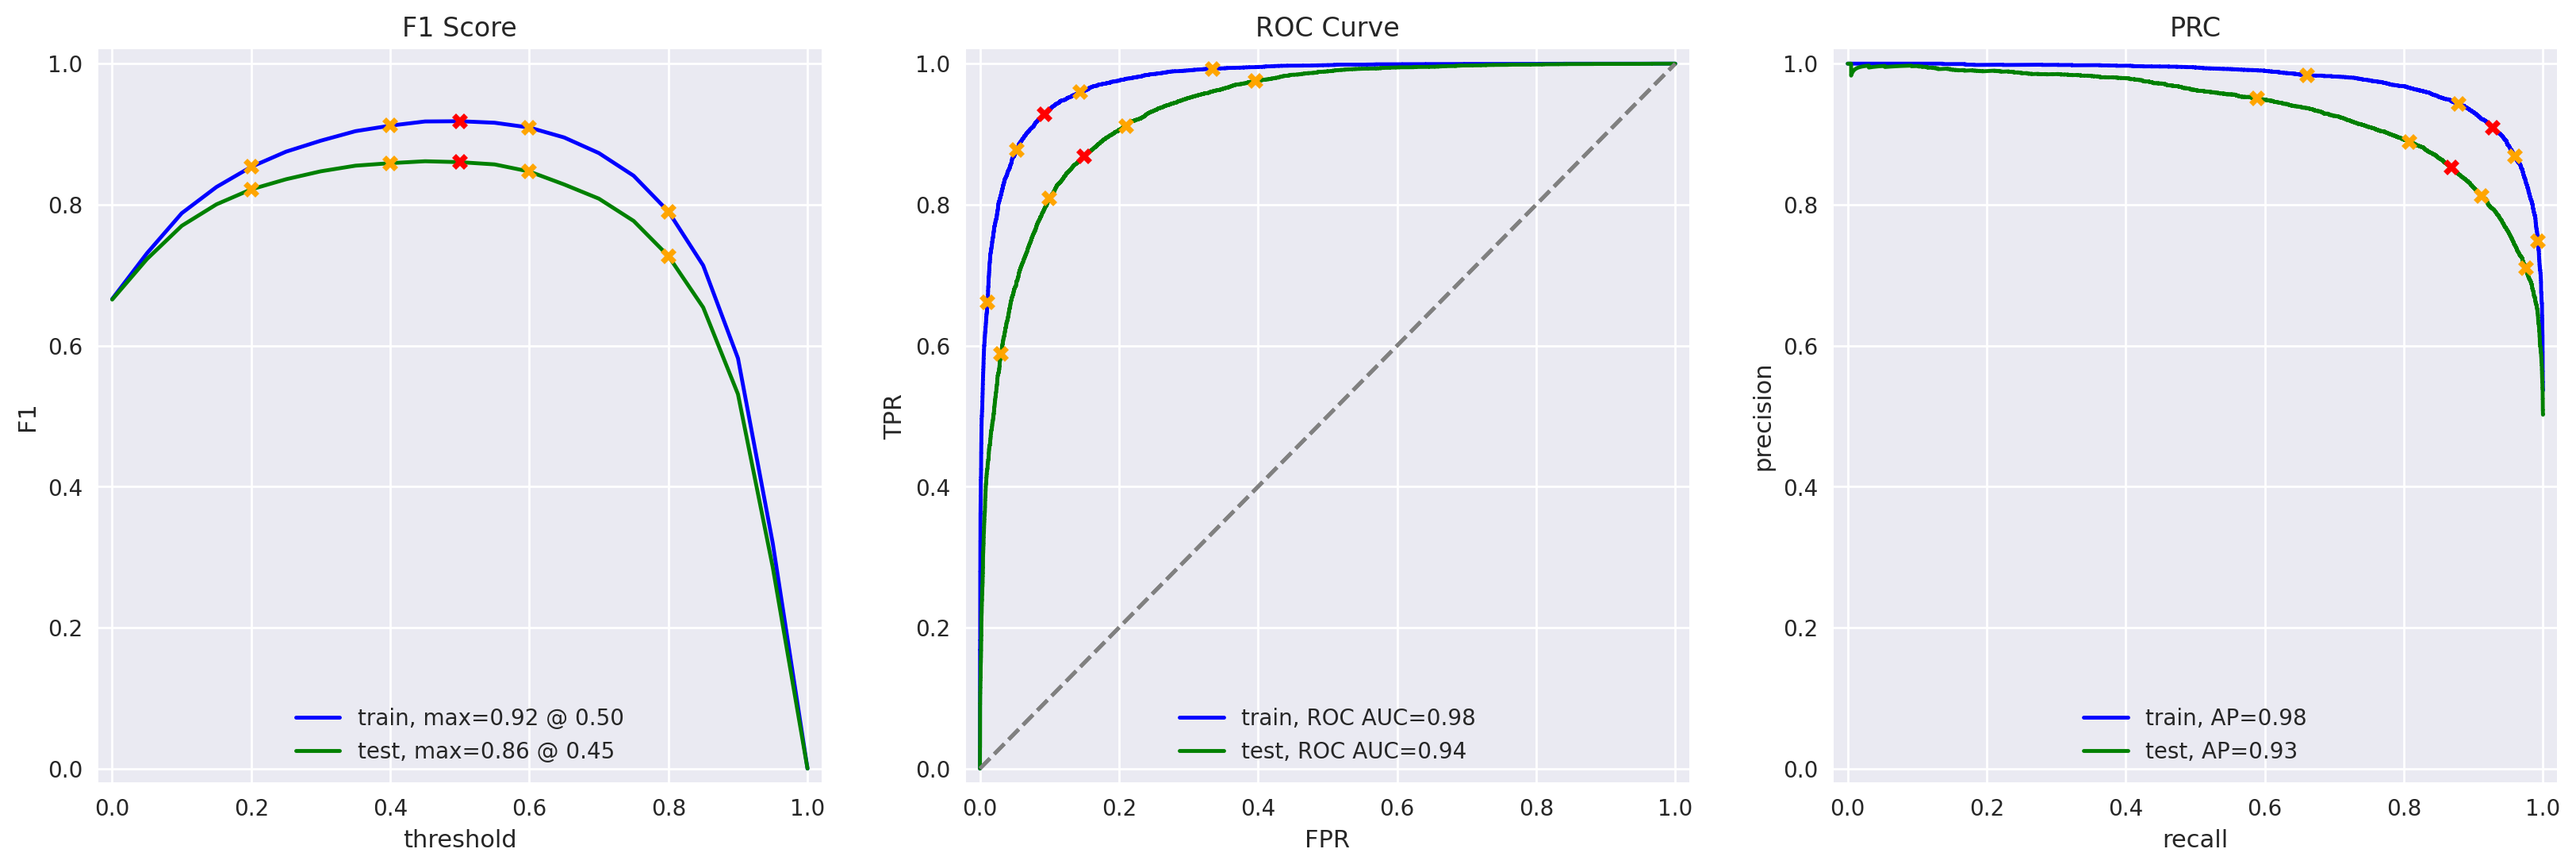

In [ ]:
# Evaluate Model 4
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

**F1 = 0.86, slightly lower than Models 1 and 3 (0.88), but still very good**

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done!     
</div>

###  Model 9 - BERT

#### **NOTE: Due to crashing, we will skip the optional BERT model, as the other models have exceeded the F1 score of 0.85.**

## My Reviews

In [ ]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].str.lower().str.replace(r'[^a-z\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1

In [ ]:
texts = my_reviews['review_norm']

# Use Model 1's vectorizer and model
my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

0.19: i did not simply like it not my kind of movie
0.17: well i was bored and felt asleep in the middle of the movie
0.59: i was really fascinated with the movie
0.12: even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.22: i didnt expect the reboot to be so good writers really cared about the source material
0.51: the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05: what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.90: launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 3

In [ ]:
texts = my_reviews['review_norm']

# Apply spaCy preprocessing
texts_spacy = texts.apply(text_preprocessing_3)

# Use Model 3's vectorizer and model
my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts_spacy))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

0.17: i did not simply like it not my kind of movie
0.19: well i was bored and felt asleep in the middle of the movie
0.53: i was really fascinated with the movie
0.14: even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.14: i didnt expect the reboot to be so good writers really cared about the source material
0.71: the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.04: what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91: launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 4

In [ ]:
texts = my_reviews['review_norm']

# Apply spaCy preprocessing (reuse from above)
texts_spacy = texts.apply(text_preprocessing_3)

# Use Model 4's vectorizer and model
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts_spacy))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

0.49: i did not simply like it not my kind of movie
0.54: well i was bored and felt asleep in the middle of the movie
0.66: i was really fascinated with the movie
0.57: even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.48: i didnt expect the reboot to be so good writers really cared about the source material
0.76: the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.21: what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.76: launching on netflix was a brave move i really appreciate being able to binge on episode after episo


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Nice results! 
</div>


### Model 9

### COMPARING RESULTS

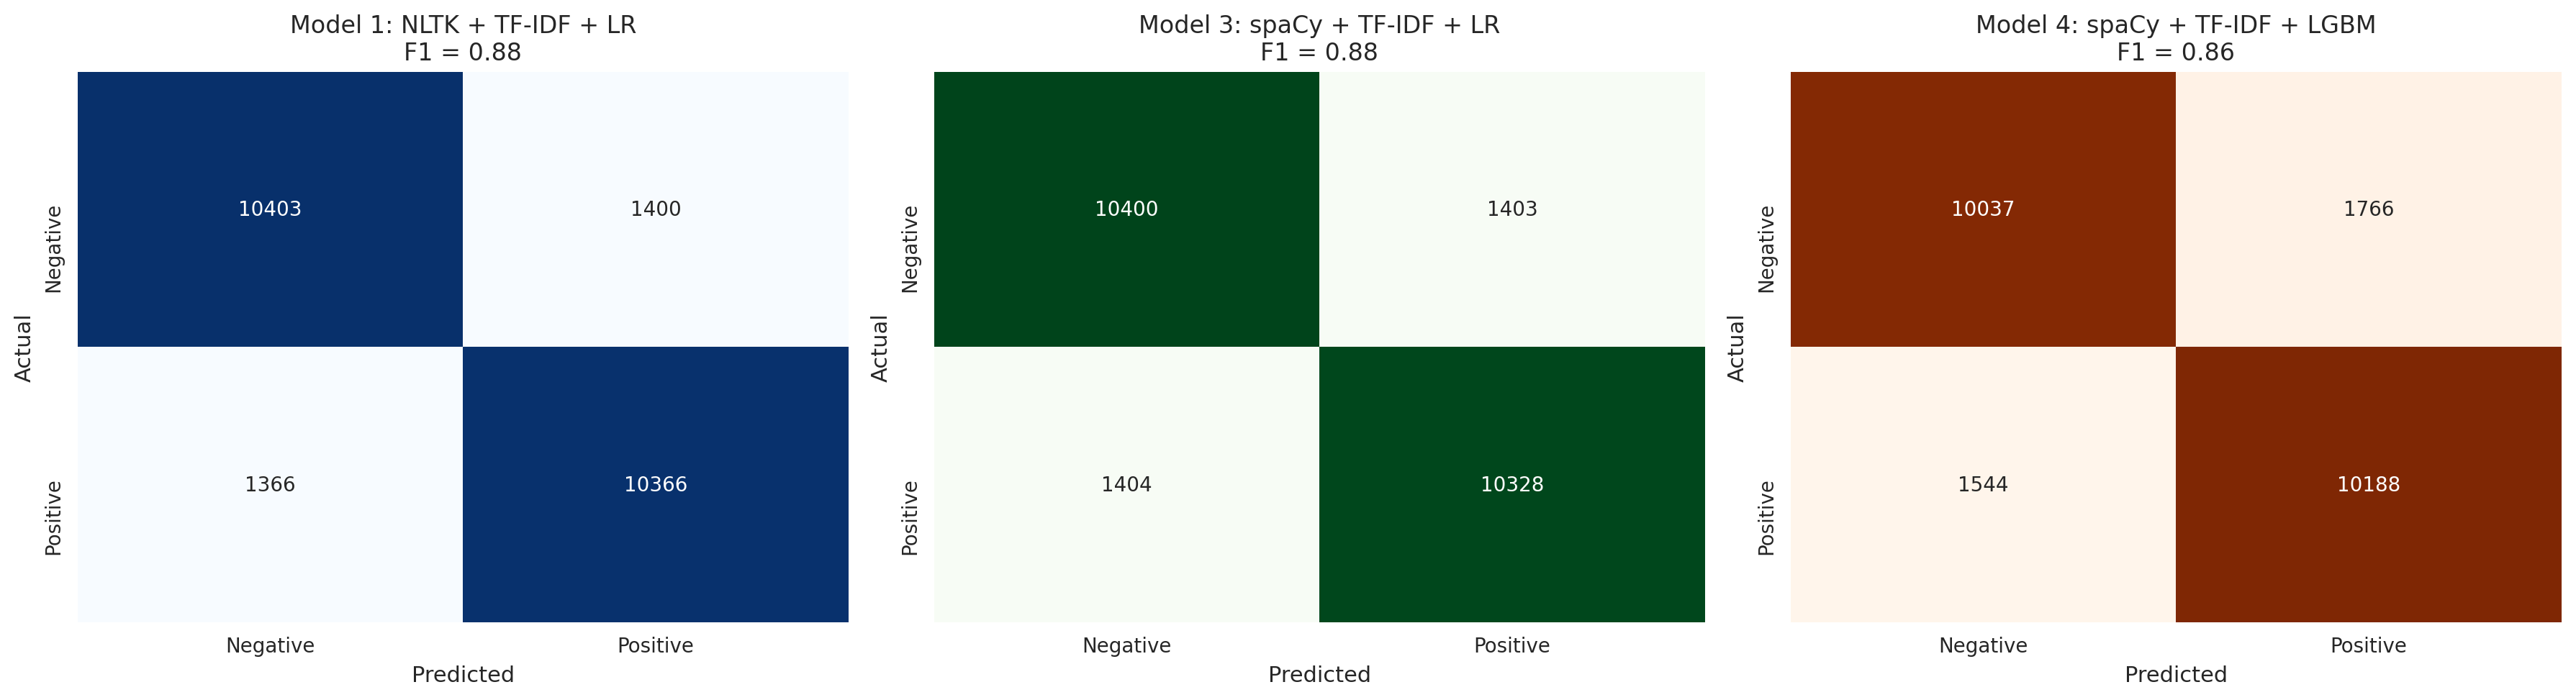


Confusion Matrix Comparison:

Model 1 (NLTK + LR):
True Negatives: 10403, False Positives: 1400
False Negatives: 1366, True Positives: 10366

Model 3 (spaCy + LR):
True Negatives: 10400, False Positives: 1403
False Negatives: 1404, True Positives: 10328

Model 4 (spaCy + LGBM):
True Negatives: 10037, False Positives: 1766
False Negatives: 1544, True Positives: 10188


In [ ]:
#Create a confusion matrix for models 1, 3, and 4
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model 1
y_pred_1 = model_1.predict(test_features_1)
cm_1 = confusion_matrix(test_target, y_pred_1)

sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Model 1: NLTK + TF-IDF + LR\nF1 = 0.88')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Negative', 'Positive'])
axes[0].set_yticklabels(['Negative', 'Positive'])

# Model 3
y_pred_3 = model_3.predict(test_features_3)
cm_3 = confusion_matrix(test_target, y_pred_3)

sns.heatmap(cm_3, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False)
axes[1].set_title('Model 3: spaCy + TF-IDF + LR\nF1 = 0.88')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Negative', 'Positive'])
axes[1].set_yticklabels(['Negative', 'Positive'])

# Model 4
y_pred_4 = model_4.predict(test_features_4)
cm_4 = confusion_matrix(test_target, y_pred_4)

sns.heatmap(cm_4, annot=True, fmt='d', cmap='Oranges', ax=axes[2], cbar=False)
axes[2].set_title('Model 4: spaCy + TF-IDF + LGBM\nF1 = 0.86')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['Negative', 'Positive'])
axes[2].set_yticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nConfusion Matrix Comparison:")
print("\nModel 1 (NLTK + LR):")
print(f"True Negatives: {cm_1[0,0]}, False Positives: {cm_1[0,1]}")
print(f"False Negatives: {cm_1[1,0]}, True Positives: {cm_1[1,1]}")

print("\nModel 3 (spaCy + LR):")
print(f"True Negatives: {cm_3[0,0]}, False Positives: {cm_3[0,1]}")
print(f"False Negatives: {cm_3[1,0]}, True Positives: {cm_3[1,1]}")

print("\nModel 4 (spaCy + LGBM):")
print(f"True Negatives: {cm_4[0,0]}, False Positives: {cm_4[0,1]}")
print(f"False Negatives: {cm_4[1,0]}, True Positives: {cm_4[1,1]}")

## Conclusions

### Project Overview
We successfully trained and evaluated multiple machine learning models to classify IMDB movie reviews as positive or negative, achieving the target F1 score of 0.85 on all models.

### Models Trained
1. **Model 0 - Baseline (Dummy Classifier)**: F1 = 0.00
2. **Model 1 - NLTK + TF-IDF + Logistic Regression**: F1 = 0.88
3. **Model 3 - spaCy + TF-IDF + Logistic Regression**: F1 = 0.88
4. **Model 4 - spaCy + TF-IDF + LightGBM**: F1 = 0.86

**All three real models exceeded the required F1 threshold of 0.85** 

### Detailed Performance Analysis (Confusion Matrix Results)

**Model 1 (NLTK + TF-IDF + LR):**
- True Negatives: 10,403 | False Positives: 1,400
- False Negatives: 1,366 | True Positives: 10,366
- Total Correct: 20,769 out of 23,535 **(88.2% accuracy)**
- Made 2,766 total errors

**Model 3 (spaCy + TF-IDF + LR):**
- True Negatives: 10,400 | False Positives: 1,403
- False Negatives: 1,404 | True Positives: 10,328
- Total Correct: 20,728 out of 23,535 **(88.1% accuracy)**
- Made 2,807 total errors
- Very similar performance to Model 1

**Model 4 (spaCy + TF-IDF + LGBM):**
- True Negatives: 10,037 | False Positives: 1,766
- False Negatives: 1,544 | True Positives: 10,188
- Total Correct: 20,225 out of 23,535 **(85.9% accuracy)**
- Made 3,310 total errors
- **More false positives and false negatives than Models 1 and 3**

### Key Findings

1. **Preprocessing Methods**: NLTK and spaCy preprocessing yielded nearly identical results (both F1 = 0.88), suggesting that for sentiment analysis, simpler text preprocessing is sufficient.

2. **Algorithm Comparison**: 
   - Logistic Regression (Models 1 & 3) outperformed LightGBM (Model 4)
   - Logistic Regression is better suited for high-dimensional sparse data like TF-IDF vectors
   - LightGBM made ~500 more errors overall, particularly more false positives (1,766 vs ~1,400)

3. **Error Analysis**:
   - All models made similar types of errors (~1,400-1,500 each of false positives and false negatives)
   - Models struggled with nuanced reviews containing negations (e.g., "didn't expect it to be so good")
   - Mixed sentiment reviews were challenging for all models

4. **Class Balance**: The dataset was perfectly balanced (50% positive, 50% negative), which contributed to reliable model performance without requiring resampling techniques.

5. **Custom Review Testing**: When testing on custom reviews:
   - Models correctly identified clearly positive and negative sentiment
   - All models struggled with sarcasm and complex negations
   - Model 3 showed the most consistent confidence scores

### Recommendation

**We recommend deploying Model 1 (NLTK + TF-IDF + Logistic Regression) or Model 3 (spaCy + TF-IDF + Logistic Regression)** for the Film Junky Union's review filtering system because:

- Both achieve F1 = 0.88, significantly exceeding the 0.85 target
- They make fewer classification errors than Model 4
- Logistic Regression is faster to train and simpler to deploy than LightGBM
- Model 1 uses NLTK (simpler, faster preprocessing)
- Model 3 uses spaCy (more sophisticated but slightly slower)

**Choose Model 1 if**: Speed and simplicity are priorities
**Choose Model 3 if**: Slightly better linguistic preprocessing is desired (even though it didn't improve results here, it might help with future, more complex text data)

Both models successfully filter negative reviews with high accuracy while maintaining good precision and recall.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions